In [804]:
# Importation des biblioth√®ques n√©cessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [805]:
# Chargement des donn√©es
achats = pd.read_excel(r'C:\Users\MEDIA TEK\Desktop\achats_commande.xlsx')

In [806]:
# Affichage du nombre de colonnes et de lignes du DataFrame"
achats.shape

(23107, 18)

In [807]:
#Affichage des 5 premiers lignes
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article        Type article  Quantit√©  UM  \
0  SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1         FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2          FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3         reparation palettes                       Service    3402.0  UN   
4         Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   

     Montant Centre de cout Date commande       Date r√©ception  \
0    3081600        D051008    03/01/2022  2022-01-12 00:00:00   
1   22276389          PR510    04/01/2022  2022-01-20 00:00:00   
2  351000000          MP510    05/01/2022  2022-01-30 00:00:00   
3   10206000       D0510055    03/01/2022  2022-01-15 00:00:00   
4    2054800          PR510    04/01/2022  2022-01-10 00:00:00   

   dur√©e de livraion  d√©lai de livraison conformit√©  Code Fournisseur  \
0                  9                  25   Conforme           5006997   
1                 16                   8   Conforme           5005182   
2                 25                   4   Conforme           5006889   
3                 12                   3   Conforme           5007369   
4                  6                   8   Conforme           5005182   

   Nom Fournisseur    adresse  
0  Soci√©t√© Mohamed      Gafsa  
1   Soci√©t√© Gharbi     Nabeul  
2  Soci√©t√© Hammami  Tataouine  
3    Soci√©t√© Allah   Jendouba  
4   Soci√©t√© Gharbi      Gab√®s

In [808]:
#Affichage des informations du DataFrame
achats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23107 entries, 0 to 23106
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soci√©t√©             23107 non-null  int64  
 1   N¬∞commande          23107 non-null  int64  
 2   Type commande       23107 non-null  object 
 3   Code article        23107 non-null  object 
 4   Article             23107 non-null  object 
 5   Type article        23107 non-null  object 
 6   Quantit√©            23107 non-null  float64
 7   UM                  23107 non-null  object 
 8   Montant             23107 non-null  int64  
 9   Centre de cout      23107 non-null  object 
 10  Date commande       23107 non-null  object 
 11  Date r√©ception      23107 non-null  object 
 12  dur√©e de livraion   23107 non-null  int64  
 13  d√©lai de livraison  23107 non-null  int64  
 14  conformit√©          23107 non-null  object 
 15  Code Fournisseur    23107 non-null  int64  
 

In [809]:
#Affichage des 5 derni√©res lignes
achats.tail()

Soci√©t√©  N¬∞commande Type commande               Code article  \
23102        5    24900731            OR  HSCLN0015                   
23103        5    24900731            OR  HSCLN0015                   
23104        5    24900732            OR  HSCLN0014                   
23105        5    24900733            OR  HSCLN0032                   
23106        5   922000015            OR  P5611013                    

                             Article  Type article  Quantit√©  UM  Montant  \
23102  frais de participation              Service       2.0  PI  1344538   
23103  hebergement                         Service       2.0  PI   280374   
23104  Abonnement salle de sport           Service       1.0  PI   873000   
23105  disque dur externe SSD 512 go      Mat√©riel       1.0  PI     1000   
23106  COLLIER DE SERRAGE 8/14            Mat√©riel      30.0  PI    19980   

      Centre de cout Date commande       Date r√©ception  dur√©e de livraion  \
23102        D051008    24/10/2024           31/10/2024                  7   
23103        D051008    24/10/2024           31/10/2024                  7   
23104        D051008    24/10/2024           31/10/2024                  7   
23105        D051007    24/10/2024           31/10/2024                  7   
23106          PR510    05/01/2022  2022-01-08 00:00:00                  3   

       d√©lai de livraison conformit√©  Code Fournisseur      Nom Fournisseur  \
23102                  25   Conforme            559911  Soci√©t√© Ben Mabrouk   
23103                  25   Conforme            559911  Soci√©t√© Ben Mabrouk   
23104                  25   Conforme            559911  Soci√©t√© Ben Mabrouk   
23105                  50   Conforme            550645    Soci√©t√© Ben naser   
23106                   8   Conforme           5005182       Soci√©t√© Gharbi   

           adresse  
23102  Sidi Bouzid  
23103    Kasserine  
23104      Bizerte  
23105    Kasserine  
23106        Tunis

In [810]:
# V√©rification des valeurs manquantes
achats.isnull().sum()

Soci√©t√©               0
N¬∞commande            0
Type commande         0
Code article          0
Article               0
Type article          0
Quantit√©              0
UM                    0
Montant               0
Centre de cout        0
Date commande         0
Date r√©ception        0
dur√©e de livraion     0
d√©lai de livraison    0
conformit√©            0
Code Fournisseur      0
Nom Fournisseur       0
adresse               0
dtype: int64

In [811]:
# V√©rification des doublons
achats.duplicated().sum()

np.int64(24)

In [812]:
#Suppression des doublons
achats = achats.drop_duplicates()



In [813]:
# V√©rification des doublons
achats.duplicated().sum()

np.int64(0)

In [814]:
achats.shape

(23083, 18)

In [815]:
# Conversion des dates en format datetime
achats['Date commande'] = pd.to_datetime(achats['Date commande'], dayfirst=True)
achats['Date r√©ception'] = pd.to_datetime(achats['Date r√©ception'], dayfirst=True)

In [816]:
achats

Soci√©t√©  N¬∞commande Type commande               Code article  \
0            5    22000002            HS  HSDR0007                    
1            5    22000002            OR  P6311047                    
2            5    22000003            AC  M30511105                   
3            5    22000003            HS  HSDLI007                    
4            5    22000003            OR  P9523007                    
...        ...         ...           ...                        ...   
23102        5    24900731            OR  HSCLN0015                   
23103        5    24900731            OR  HSCLN0015                   
23104        5    24900732            OR  HSCLN0014                   
23105        5    24900733            OR  HSCLN0032                   
23106        5   922000015            OR  P5611013                    

                                    Article        Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1             FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2              FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3             reparation palettes                       Service    3402.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   
...                                      ...                ...       ...  ..   
23102         frais de participation                    Service       2.0  PI   
23103         hebergement                               Service       2.0  PI   
23104         Abonnement salle de sport                 Service       1.0  PI   
23105         disque dur externe SSD 512 go            Mat√©riel       1.0  PI   
23106         COLLIER DE SERRAGE 8/14                  Mat√©riel      30.0  PI   

         Montant Centre de cout Date commande Date r√©ception  \
0        3081600        D051008    2022-01-03     2022-01-12   
1       22276389          PR510    2022-01-04     2022-01-20   
2      351000000          MP510    2022-01-05     2022-01-30   
3       10206000       D0510055    2022-01-03     2022-01-15   
4        2054800          PR510    2022-01-04     2022-01-10   
...          ...            ...           ...            ...   
23102    1344538        D051008    2024-10-24     2024-10-31   
23103     280374        D051008    2024-10-24     2024-10-31   
23104     873000        D051008    2024-10-24     2024-10-31   
23105       1000        D051007    2024-10-24     2024-10-31   
23106      19980          PR510    2022-01-05     2022-01-08   

       dur√©e de livraion  d√©lai de livraison conformit√©  Code Fournisseur  \
0                      9                  25   Conforme           5006997   
1                     16                   8   Conforme           5005182   
2                     25                   4   Conforme           5006889   
3                     12                   3   Conforme           5007369   
4                      6                   8   Conforme           5005182   
...                  ...                 ...        ...               ...   
23102                  7                  25   Conforme            559911   
23103                  7                  25   Conforme            559911   
23104                  7                  25   Conforme            559911   
23105                  7                  50   Conforme            550645   
23106                  3                   8   Conforme           5005182   

           Nom Fournisseur      adresse  
0          Soci√©t√© Mohamed        Gafsa  
1           Soci√©t√© Gharbi       Nabeul  
2          Soci√©t√© Hammami    Tataouine  
3            Soci√©t√© Allah     Jendouba  
4           Soci√©t√© Gharbi        Gab√®s  
...                    ...          ...  
23102  Soci√©t√© Ben Mabrouk  Sidi Bouzid  
23103  Soci√©t√© Ben Mabrouk    Kasserine  
23104  Soci√©t√© Ben Mabrouk      Bizerte  
23105    Soci√©t√© Ben naser    Ka

In [817]:
# Data Preparation
# Dictionnaire de conversion vers kilogrammes
conversion_factors = {
    'UN': 1,   # Par d√©faut, 1 unit√© = 1 kg (√† ajuster selon le produit)
    'TN': 1000, # 1 tonne = 1000 kg
    'KG': 1,   # D√©j√† en kg
    'PC': 1,   # Par d√©faut, 1 pi√®ce = 1 kg (√† ajuster selon le produit)
    'LT': 1,   # D√©j√† en litre
    'RA': 0.5, # Exemple : 1 rame = 0.5 kg (ajustez selon le poids r√©el)
    'PI': 1,   # Par d√©faut, 1 paquet = 1 kg (√† ajuster selon le produit)
    'PA': 20,  # Exemple : 1 palette = 20 kg (ajustez selon le poids r√©el)
    'BT': 0.5, # Exemple : 1 bo√Æte = 0.5 kg (ajustez selon le produit)
    'MI': 1,   # Par d√©faut, 1 millier = 1 kg (√† ajuster selon le produit)
    'MT': 0.5, # Hypoth√®se : 1 m√®tre = 0.5 kg (ajustez selon le produit)
    'CT': 5,   # Exemple : 1 carton = 5 kg (ajustez selon le poids r√©el)
    'PQ': 0.2, # Exemple : 1 paquet = 0.2 kg (ajustez selon le produit)
    'PT': 10,  # Exemple : 1 palette = 10 kg (ajustez selon le poids r√©el)
    'EA': 1,   # Par d√©faut, 1 each = 1 kg (√† ajuster selon le produit)
    'KT': 5,   # Exemple : 1 kit = 5 kg (ajustez selon le poids r√©el)
    'RO': 0.1, # Exemple : 1 r√¥le = 0.1 kg (ajustez selon le produit)
    'GR': 0.001# 1 gramme = 0.001 kg
}

In [818]:
# Fonction de normalisation
def normalize_quantity(row):
    um = row['UM']
    quantity = row['Quantit√©']
    
    # Appliquer le facteur de conversion si disponible
    if um in conversion_factors:
        return quantity * conversion_factors[um]
    else:
        return None

In [819]:
# Ajout de la colonne Quantit√©_kg
achats['Quantit√©_kg'] = achats.apply(normalize_quantity, axis=1)

In [820]:
# Affichage des donn√©es apr√®s normalisation
achats[['Code article', 'Article ', 'Quantit√©', 'UM', 'Quantit√©_kg']].head(20)

Code article                               Article   \
0   HSDR0007                   SRTJ du E2:E13530/11/2021.              
1   P6311047                          FUEL LOURD N¬∞2                   
2   M30511105                          FILM THERMOR√âTRACTABLE NG 40¬µ   
3   HSDLI007                          reparation palettes              
4   P9523007                          Glasse de niv Type A N¬∞7 A/JTS   
5   M21501039                         CARTON INTERCALAIRE KRAFT 250G   
6   HSDLI003                          transport beurre"landor"         
7   HSDT0020                          Capteur pression r√©f1089049252   
8   M30511034                         FILM ETIRABLE TRANSMANUEL L:50   
9   M30511031                         FILM ETIRORETRACTABLETRANSPAR    
10  HSDR0009                          FA21/238457                      
11  HSDR0009                          FA21/238457                      
12  HSDR0009                          FA21/238457                      
13  HSDR0009                          FA21/238457                      
14  HSDR0009                          FA21/238457                      
15  HSDR0009                          FA21/238457                      
16  HSDT0003                          ausculation par cam√©ra forage    
17  MCFRB0098                         PAIRE DE CISEAUX                 
18  MCFRB0126                         RAME PAPIER EXTRA BLANC          
19  MCFRB0019                         CAHIER REGISTRE 200 PAGES        

    Quantit√©  UM  Quantit√©_kg  
0       1.00  UN         1.00  
1      30.00  TN     30000.00  
2   45000.00  KG     45000.00  
3    3402.00  UN      3402.00  
4       2.00  PC         2.00  
5   40000.00  KG     40000.00  
6       1.00  UN         1.00  
7       1.00  UN         1.00  
8    1500.00  KG      1500.00  
9    1000.00  KG      1000.00  
10   1232.92  LT      1232.92  
11    744.64  LT       744.64  
12    527.08  LT       527.08  
13      1.00  LT         1.00  
14      1.00  LT         1.00  
15      1.00  LT         1.00  
16      1.00  UN         1.00  
17      6.00  UN         6.00  
18     16.00  RA         8.00  
19      5.00  UN         5.00

In [821]:
achats[achats['UM'] == 'MT'].head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
323        5    22000146            OR  P9912074                    
745        5    22000072            OR  P2122003                    
746        5    22000072            OR  P2122005                    
747        5    22000072            OR  P2122006                    
748        5    22000072            OR  P2122009                    

                           Article  Type article  Quantit√©  UM  Montant  \
323  TUBE D'AIR TRANSPARENT DIA4X1      Mat√©riel      30.0  MT   361917   
745  TUBE POLYAMIDE BLEU                Mat√©riel     400.0  MT   810000   
746  TUBE POLYAMIDE BLEU DIA 08         Mat√©riel     200.0  MT   477000   
747  TUB-POLYAMIDESEMI RIG DIA10X8      Mat√©riel     200.0  MT   378000   
748  TUB-POLYAMIDE SEMI RIG DIA 12      Mat√©riel      50.0  MT   314235   

    Centre de cout Date commande Date r√©ception  dur√©e de livraion  \
323          PR510    2022-01-28     2022-02-05                  8   
745          PR510    2022-01-14     2022-01-20                  6   
746          PR510    2022-01-14     2022-01-20                  6   
747          PR510    2022-01-14     2022-01-20                  6   
748          PR510    2022-01-14     2022-01-20                  6   

     d√©lai de livraison conformit√©  Code Fournisseur Nom Fournisseur  \
323                   8   Conforme           5005182  Soci√©t√© Gharbi   
745                   8   Conforme           5005182  Soci√©t√© Gharbi   
746                   8   Conforme           5005182  Soci√©t√© Gharbi   
747                   8   Conforme           5005182  Soci√©t√© Gharbi   
748                   8   Conforme           5005182  Soci√©t√© Gharbi   

       adresse  Quantit√©_kg  
323       B√©ja         15.0  
745      Tunis        200.0  
746      Gafsa        100.0  
747      Tunis        100.0  
748  Tataouine         25.0

In [822]:
# Calcul du co√ªt unitaire pour chaque ligne
achats['Co√ªt unitaire'] = achats['Montant'] / achats['Quantit√©_kg']



In [823]:
#v√©rification est effectu√©e pour s'assurer que les divisions par z√©ro ou les infinies ne se produisent pas
achats['Co√ªt unitaire'] = achats['Co√ªt unitaire'].replace([np.inf, -np.inf], np.nan).fillna(0)  # G√©rer les divisions par z√©ro

In [824]:
# Affichage des r√©sultats
achats[['Code article', 'Article ', 'Quantit√©', 'UM', 'Quantit√©_kg', 'Co√ªt unitaire']].head(20)

Code article                               Article   \
0   HSDR0007                   SRTJ du E2:E13530/11/2021.              
1   P6311047                          FUEL LOURD N¬∞2                   
2   M30511105                          FILM THERMOR√âTRACTABLE NG 40¬µ   
3   HSDLI007                          reparation palettes              
4   P9523007                          Glasse de niv Type A N¬∞7 A/JTS   
5   M21501039                         CARTON INTERCALAIRE KRAFT 250G   
6   HSDLI003                          transport beurre"landor"         
7   HSDT0020                          Capteur pression r√©f1089049252   
8   M30511034                         FILM ETIRABLE TRANSMANUEL L:50   
9   M30511031                         FILM ETIRORETRACTABLETRANSPAR    
10  HSDR0009                          FA21/238457                      
11  HSDR0009                          FA21/238457                      
12  HSDR0009                          FA21/238457                      
13  HSDR0009                          FA21/238457                      
14  HSDR0009                          FA21/238457                      
15  HSDR0009                          FA21/238457                      
16  HSDT0003                          ausculation par cam√©ra forage    
17  MCFRB0098                         PAIRE DE CISEAUX                 
18  MCFRB0126                         RAME PAPIER EXTRA BLANC          
19  MCFRB0019                         CAHIER REGISTRE 200 PAGES        

    Quantit√©  UM  Quantit√©_kg  Co√ªt unitaire  
0       1.00  UN         1.00   3.081600e+06  
1      30.00  TN     30000.00   7.425463e+02  
2   45000.00  KG     45000.00   7.800000e+03  
3    3402.00  UN      3402.00   3.000000e+03  
4       2.00  PC         2.00   1.027400e+06  
5   40000.00  KG     40000.00   1.945000e+03  
6       1.00  UN         1.00   4.500000e+05  
7       1.00  UN         1.00   0.000000e+00  
8    1500.00  KG      1500.00   6.200000e+03  
9    1000.00  KG      1000.00   7.500000e+03  
10   1232.92  LT      1232.92   1.534000e+03  
11    744.64  LT       744.64   1.691000e+03  
12    527.08  LT       527.08   1.358001e+03  
13      1.00  LT         1.00   7.437400e+04  
14      1.00  LT         1.00   3.103800e+04  
15      1.00  LT         1.00   5.204100e+04  
16      1.00  UN         1.00   0.000000e+00  
17      6.00  UN         6.00   1.850000e+03  
18     16.00  RA         8.00   2.700000e+04  
19      5.00  UN         5.00   5.900000e+03

In [825]:
# Conversion de la colonne "conformit√©" en valeurs num√©riques (1 pour "Conforme", 0 pour "Non conforme")
achats['conformit√©'] = achats['conformit√©'].apply(lambda x: 1 if x == 'Conforme' else 0)

In [826]:
achats.head(8)

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    
5        5    22000004            AC  M21501039                   
6        5    22000004            HS  HSDLI003                    
7        5    22000004            OR  HSDT0020                    

                                Article        Type article  Quantit√©  UM  \
0  SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1         FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2          FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3         reparation palettes                       Service    3402.0  UN   
4         Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   
5         CARTON INTERCALAIRE KRAFT 250G  Produit emballage   40000.0  KG   
6         transport beurre"landor"                  Service       1.0  UN   
7         Capteur pression r√©f1089049252           Mat√©riel       1.0  UN   

     Montant Centre de cout Date commande Date r√©ception  dur√©e de livraion  \
0    3081600        D051008    2022-01-03     2022-01-12                  9   
1   22276389          PR510    2022-01-04     2022-01-20                 16   
2  351000000          MP510    2022-01-05     2022-01-30                 25   
3   10206000       D0510055    2022-01-03     2022-01-15                 12   
4    2054800          PR510    2022-01-04     2022-01-10                  6   
5   77800000          MP510    2022-01-07     2022-01-31                 24   
6     450000       D0510055    2022-01-03     2022-01-17                 14   
7          0       D0510010    2022-01-04     2022-01-10                  6   

   d√©lai de livraison  conformit√©  Code Fournisseur  Nom Fournisseur  \
0                  25           1           5006997  Soci√©t√© Mohamed   
1                   8           1           5005182   Soci√©t√© Gharbi   
2                   4           1           5006889  Soci√©t√© Hammami   
3                   3           1           5007369    Soci√©t√© Allah   
4                   8           1           5005182   Soci√©t√© Gharbi   
5                   4           1           5007196      Soci√©t√© Ali   
6                   3           1           5005954    Soci√©t√© Dridi   
7                  10           0            550737   Soci√©t√© Cherif   

     adresse  Quantit√©_kg  Co√ªt unitaire  
0      Gafsa          1.0   3.081600e+06  
1     Nabeul      30000.0   7.425463e+02  
2  Tataouine      45000.0   7.800000e+03  
3   Jendouba       3402.0   3.000000e+03  
4      Gab√®s          2.0   1.027400e+06  
5     K√©bili      40000.0   1.945000e+03  
6   Monastir          1.0   4.500000e+05  
7    Siliana          1.0   0.000000e+00

In [827]:
# Calcul du nombre total de commandes et du nombre de commandes conformes par fournisseur
conformance_rate = achats.groupby('Code Fournisseur')['conformit√©'].agg(
    Nombre_commandes_conformes='sum',  # Somme des commandes conformes
    Nombre_total_commandes='count'    # Compte total des commandes
).reset_index()

In [828]:
# Calcul du taux de conformit√© en pourcentage
conformance_rate['Taux de conformit√© (%)'] = (
    conformance_rate['Nombre_commandes_conformes'] / 
    conformance_rate['Nombre_total_commandes'] * 
    100
)

In [829]:
# Fusionner le taux de conformit√© avec le DataFrame principal
achats = achats.merge(conformance_rate[['Code Fournisseur', 'Taux de conformit√© (%)']], 
                 on='Code Fournisseur', 
                 how='left')

In [830]:
achats[['Code Fournisseur', 'Nom Fournisseur', 'conformit√©', 'Taux de conformit√© (%)']].head(20)

Code Fournisseur  Nom Fournisseur  conformit√©  Taux de conformit√© (%)
0            5006997  Soci√©t√© Mohamed           1              100.000000
1            5005182   Soci√©t√© Gharbi           1               72.143532
2            5006889  Soci√©t√© Hammami           1              100.000000
3            5007369    Soci√©t√© Allah           1              100.000000
4            5005182   Soci√©t√© Gharbi           1               72.143532
5            5007196      Soci√©t√© Ali           1              100.000000
6            5005954    Soci√©t√© Dridi           1              100.000000
7             550737   Soci√©t√© Cherif           0               89.845095
8            5005716    Soci√©t√© Ayari           1              100.000000
9            5005716    Soci√©t√© Ayari           1              100.000000
10           5007091    Soci√©t√© Ahmed           1              100.000000
11           5007091    Soci√©t√© Ahmed           1              100.000000
12           5007091    Soci√©t√© Ahmed           1              100.000000
13           5007091    Soci√©t√© Ahmed           1              100.000000
14           5007091    Soci√©t√© Ahmed           1              100.000000
15           5007091    Soci√©t√© Ahmed           1              100.000000
16            550737   Soci√©t√© Cherif           0               89.845095
17           5005814    Soci√©t√© Sassi           1              100.000000
18           5005814    Soci√©t√© Sassi           1              100.000000
19           5005814    Soci√©t√© Sassi           1              100.000000

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\1318773309.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(


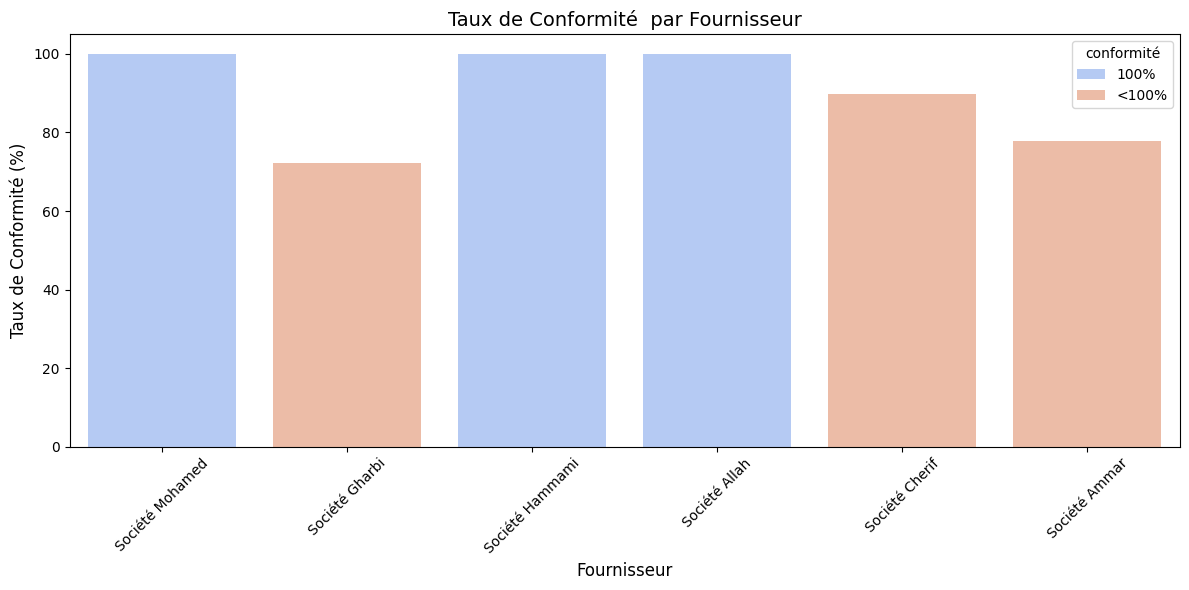

In [831]:
# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de conformit√© (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformit√© (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 fournisseurs avec conformit√© 100% et 3 avec inf√©rieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Cr√©er un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de conformit√© (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformit√©  par Fournisseur', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Conformit√© (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\2691924116.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(


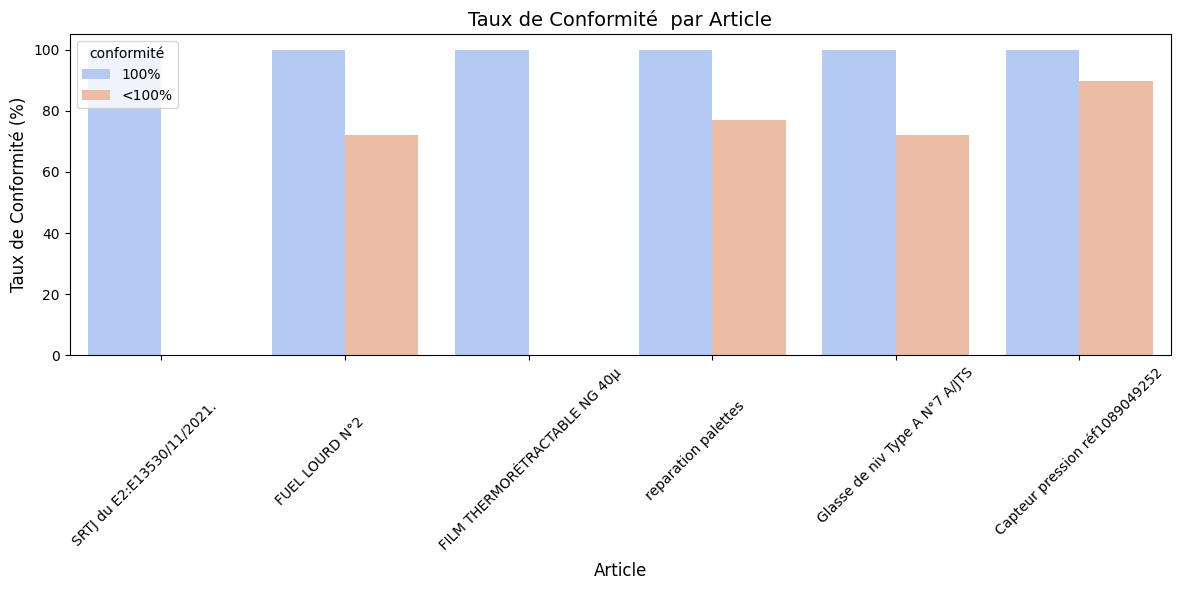

In [832]:

# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de conformit√© (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformit√© (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 articles avec conformit√© 100% et 3 avec inf√©rieur)
articles_100 = conformite_100['Article '].unique()[:3]  # 3 articles avec taux 100%
articles_inferieur = conformite_inferieur['Article '].unique()[:3]  # 3 articles avec taux < 100%

# Cr√©er un sous-ensemble avec ces articles
articles_selectionnes = np.concatenate([articles_100, articles_inferieur])

# Filtrer les donn√©es pour ne garder que ces articles
achats_filtr√©s = achats[achats['Article '].isin(articles_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Article ', y='Taux de conformit√© (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformit√©  par Article', fontsize=14)
plt.xlabel('Article', fontsize=12)
plt.ylabel('Taux de Conformit√© (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()








C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\2915302155.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(


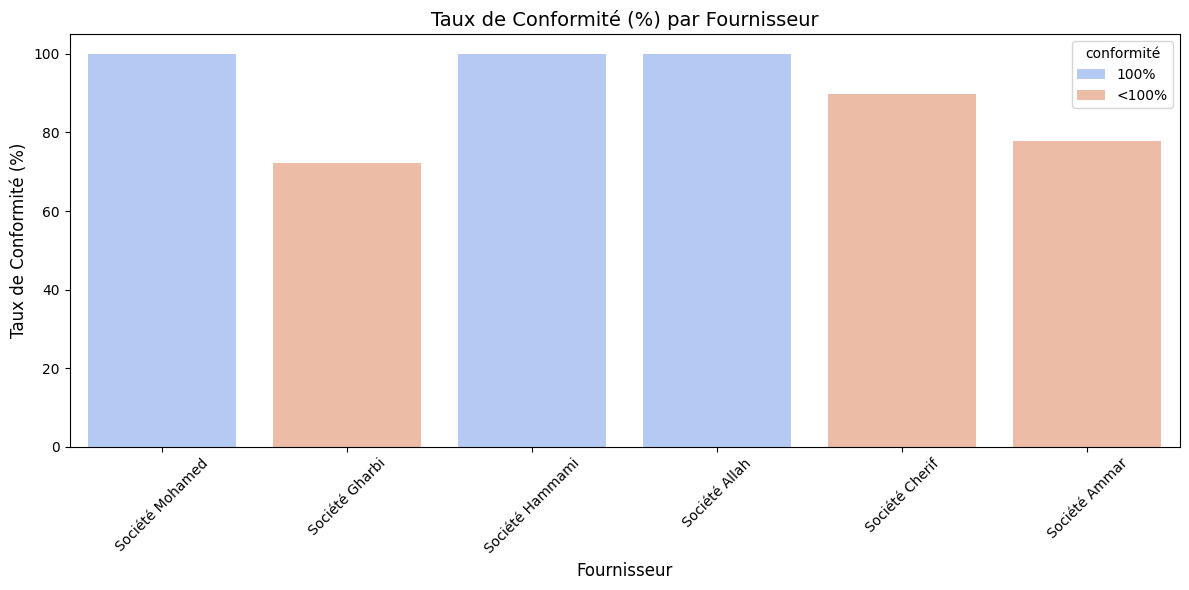

In [833]:

# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de conformit√© (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformit√© (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 fournisseurs avec conformit√© 100% et 3 avec inf√©rieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Cr√©er un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de conformit√© (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformit√© (%) par Fournisseur', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Conformit√© (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


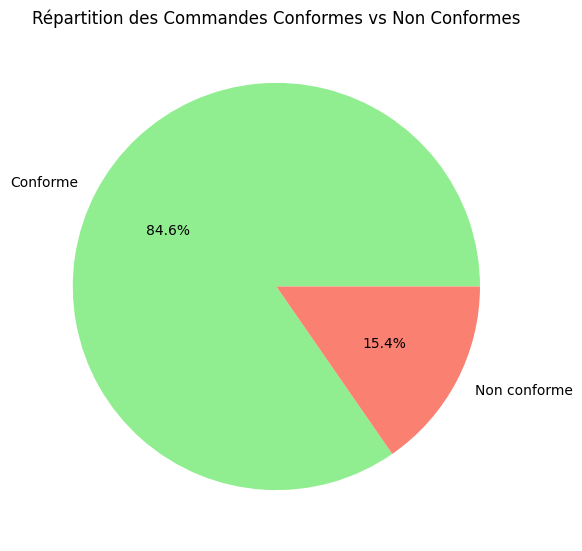

In [834]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['conformit√©'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=['Conforme', 'Non conforme'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('R√©partition des Commandes Conformes vs Non Conformes')
plt.tight_layout()
plt.show()

In [835]:
# Calcul de l'√©cart de d√©lai
achats['√âcart de d√©lai'] = achats['dur√©e de livraion'] - achats['d√©lai de livraison']

In [836]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article        Type article  Quantit√©  UM  \
0  SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1         FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2          FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3         reparation palettes                       Service    3402.0  UN   
4         Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   

     Montant Centre de cout  ... dur√©e de livraion d√©lai de livraison  \
0    3081600        D051008  ...                 9                 25   
1   22276389          PR510  ...                16                  8   
2  351000000          MP510  ...                25                  4   
3   10206000       D0510055  ...                12                  3   
4    2054800          PR510  ...                 6                  8   

   conformit√©  Code Fournisseur  Nom Fournisseur    adresse Quantit√©_kg  \
0           1           5006997  Soci√©t√© Mohamed      Gafsa         1.0   
1           1           5005182   Soci√©t√© Gharbi     Nabeul     30000.0   
2           1           5006889  Soci√©t√© Hammami  Tataouine     45000.0   
3           1           5007369    Soci√©t√© Allah   Jendouba      3402.0   
4           1           5005182   Soci√©t√© Gharbi      Gab√®s         2.0   

  Co√ªt unitaire  Taux de conformit√© (%)  √âcart de d√©lai  
0  3.081600e+06              100.000000             -16  
1  7.425463e+02               72.143532               8  
2  7.800000e+03              100.000000              21  
3  3.000000e+03              100.000000               9  
4  1.027400e+06               72.143532              -2  

[5 rows x 22 columns]

In [837]:
# Cr√©er une nouvelle colonne pour indiquer si le d√©lai est respect√© (0 ou positif) ou en retard (n√©gatif)
achats['Statut Livraison'] = np.where(achats['√âcart de d√©lai'] > 0, 'Retard', 'Respect√©')

In [838]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article        Type article  Quantit√©  UM  \
0  SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1         FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2          FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3         reparation palettes                       Service    3402.0  UN   
4         Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   

     Montant Centre de cout  ... d√©lai de livraison conformit√©  \
0    3081600        D051008  ...                 25          1   
1   22276389          PR510  ...                  8          1   
2  351000000          MP510  ...                  4          1   
3   10206000       D0510055  ...                  3          1   
4    2054800          PR510  ...                  8          1   

   Code Fournisseur  Nom Fournisseur    adresse  Quantit√©_kg Co√ªt unitaire  \
0           5006997  Soci√©t√© Mohamed      Gafsa          1.0  3.081600e+06   
1           5005182   Soci√©t√© Gharbi     Nabeul      30000.0  7.425463e+02   
2           5006889  Soci√©t√© Hammami  Tataouine      45000.0  7.800000e+03   
3           5007369    Soci√©t√© Allah   Jendouba       3402.0  3.000000e+03   
4           5005182   Soci√©t√© Gharbi      Gab√®s          2.0  1.027400e+06   

  Taux de conformit√© (%)  √âcart de d√©lai  Statut Livraison  
0             100.000000             -16          Respect√©  
1              72.143532               8            Retard  
2             100.000000              21            Retard  
3             100.000000               9            Retard  
4              72.143532              -2          Respect√©  

[5 rows x 23 columns]

<Figure size 1200x600 with 0 Axes>

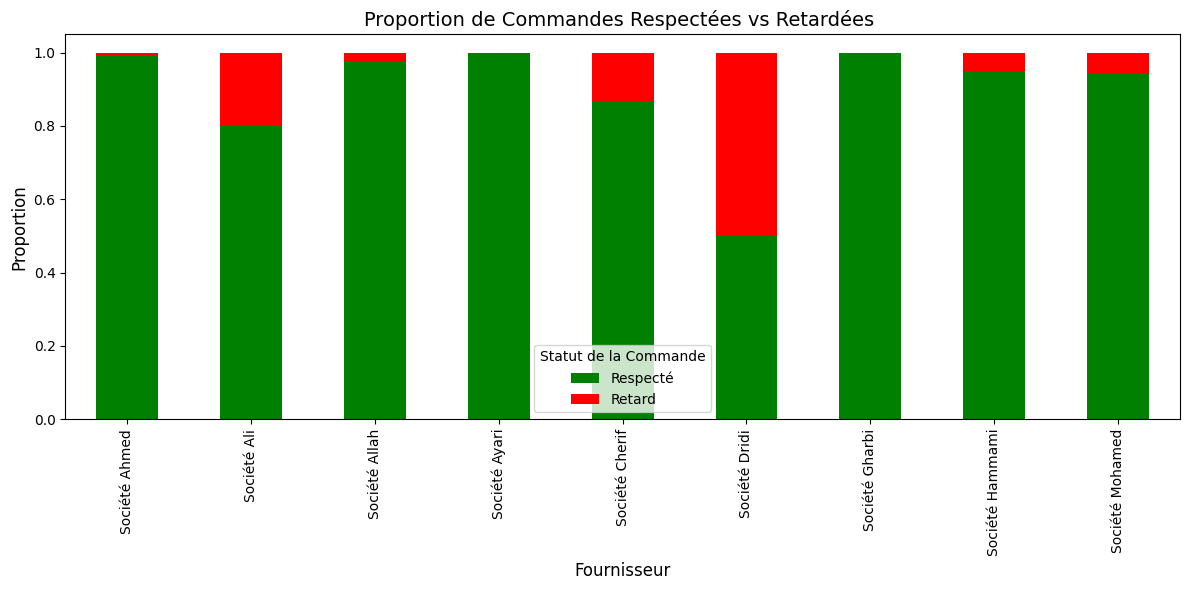

In [839]:


# S√©lectionner quelques fournisseurs avec des retards et d'autres respectant les d√©lais
fournisseurs_retard = achats[achats['Statut Livraison'] == 'Retard']['Nom Fournisseur'].unique()[:5]  # S√©lectionner 5 fournisseurs en retard
fournisseurs_respecte = achats[achats['Statut Livraison'] == 'Respect√©']['Nom Fournisseur'].unique()[:5]  # S√©lectionner 5 fournisseurs respect√©s

# Combiner les deux sous-ensembles de fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_retard, fournisseurs_respecte])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Calculer la proportion de respect / retard par fournisseur
status_proportion = achats_filtr√©s.groupby(['Nom Fournisseur', 'Statut Livraison']).size().unstack(fill_value=0)
status_proportion = status_proportion.div(status_proportion.sum(axis=1), axis=0)  # Normaliser

# Tracer le graphique √† barres empil√©es
plt.figure(figsize=(12, 6))
status_proportion.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))

# Ajouter un titre et des labels
plt.title('Proportion de Commandes Respect√©es vs Retard√©es ', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=90)

# Ajouter une l√©gende
plt.legend(title='Statut de la Commande', labels=['Respect√©', 'Retard'])

# Afficher le graphique
plt.tight_layout()
plt.show()



In [840]:
#nombre de commandes par fournisseur
commande_count_by_supplier = achats['Code Fournisseur'].value_counts().reset_index()
commande_count_by_supplier.columns = ['Code Fournisseur', 'Nombre de commandes']

achats = achats.merge(commande_count_by_supplier, on='Code Fournisseur', how='left')

In [841]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article        Type article  Quantit√©  UM  \
0  SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1         FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2          FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3         reparation palettes                       Service    3402.0  UN   
4         Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   

     Montant Centre de cout  ... conformit√© Code Fournisseur  Nom Fournisseur  \
0    3081600        D051008  ...          1          5006997  Soci√©t√© Mohamed   
1   22276389          PR510  ...          1          5005182   Soci√©t√© Gharbi   
2  351000000          MP510  ...          1          5006889  Soci√©t√© Hammami   
3   10206000       D0510055  ...          1          5007369    Soci√©t√© Allah   
4    2054800          PR510  ...          1          5005182   Soci√©t√© Gharbi   

     adresse  Quantit√©_kg  Co√ªt unitaire Taux de conformit√© (%)  \
0      Gafsa          1.0   3.081600e+06             100.000000   
1     Nabeul      30000.0   7.425463e+02              72.143532   
2  Tataouine      45000.0   7.800000e+03             100.000000   
3   Jendouba       3402.0   3.000000e+03             100.000000   
4      Gab√®s          2.0   1.027400e+06              72.143532   

  √âcart de d√©lai  Statut Livraison  Nombre de commandes  
0            -16          Respect√©                   17  
1              8            Retard                 8472  
2             21            Retard                   20  
3              9            Retard                   43  
4             -2          Respect√©                 8472  

[5 rows x 24 columns]

In [842]:
# Fusionner les donn√©es pour r√©cup√©rer le Nom Fournisseur
commande_count_by_supplier = pd.merge(commande_count_by_supplier, achats[['Code Fournisseur', 'Nom Fournisseur']].drop_duplicates(), on='Code Fournisseur', how='left')

# V√©rifiez que 'Nom Fournisseur' a bien √©t√© ajout√©
print(commande_count_by_supplier.head())


   Code Fournisseur  Nombre de commandes  Nom Fournisseur
0           5005182                 8472   Soci√©t√© Gharbi
1           5005839                 3229  Soci√©t√© Belhadj
2           5005138                  671     Soci√©t√© Nasr
3            550737                  581   Soci√©t√© Cherif
4           5008737                  410   Soci√©t√© Ayachi


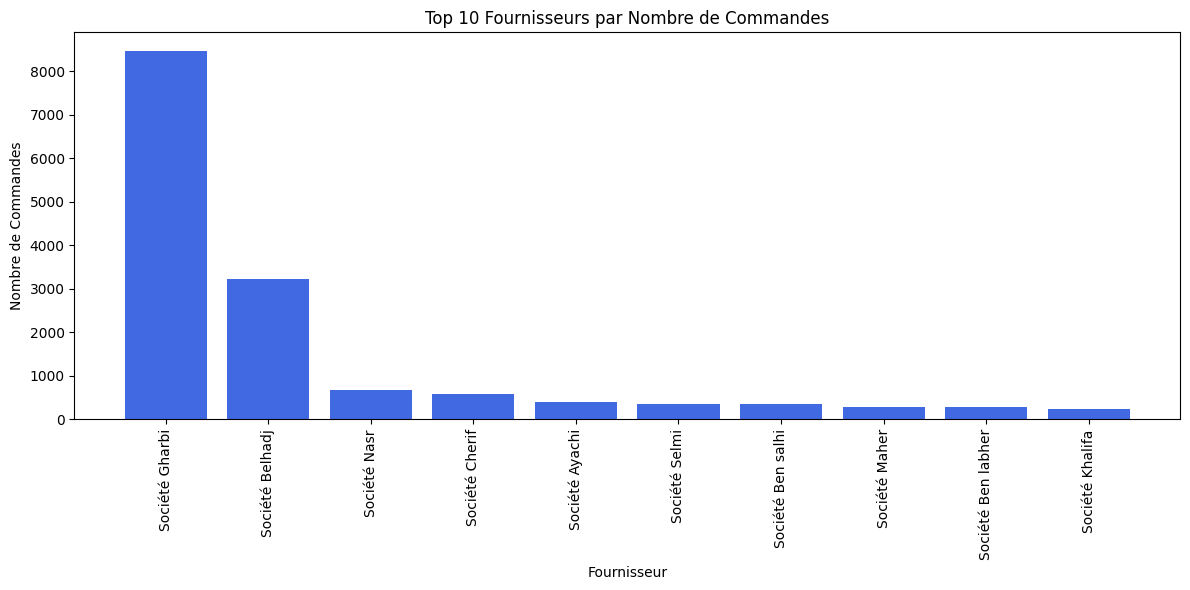

In [843]:
# S√©lectionner les 10 principaux fournisseurs
top_suppliers = commande_count_by_supplier.head(10)

# Tracer un diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(top_suppliers['Nom Fournisseur'], top_suppliers['Nombre de commandes'], color='royalblue')
plt.title('Top 10 Fournisseurs par Nombre de Commandes')
plt.xlabel('Fournisseur')
plt.ylabel('Nombre de Commandes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\3327084496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nom Fournisseur', y='Co√ªt unitaire', data=cost_per_unit_by_supplier, palette='viridis')


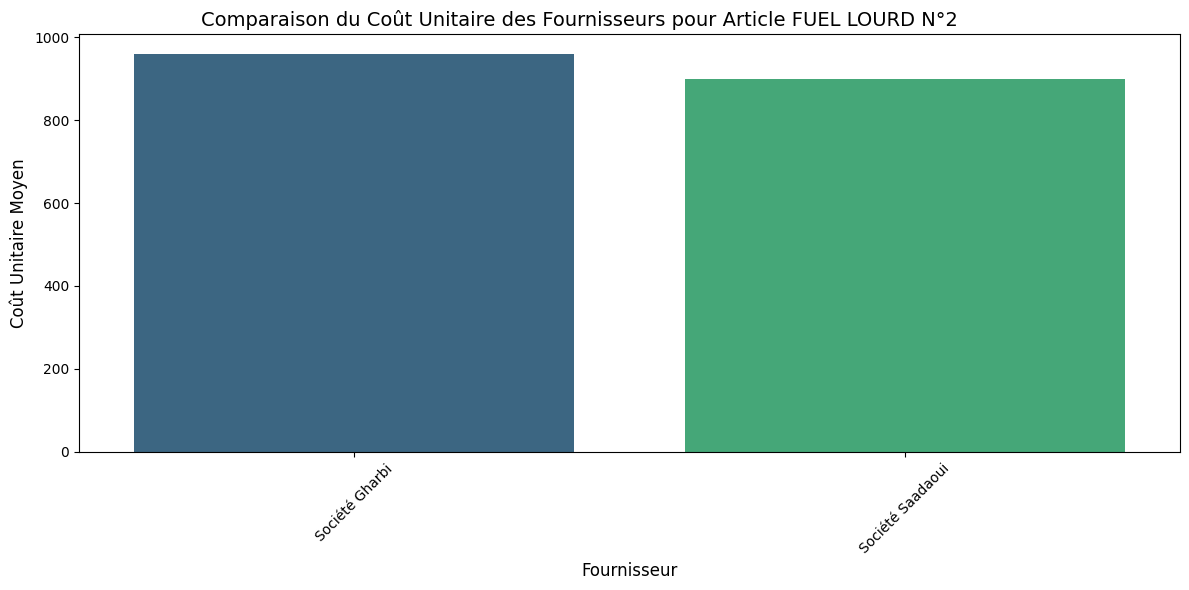

In [844]:
# S√©lectionner un article sp√©cifique (par exemple, l'article le plus fr√©quent)
article_specific = achats['Article '].mode()[0]  # Prend l'article le plus fr√©quent dans les donn√©es

# Filtrer les donn√©es pour cet article sp√©cifique
article_data = achats[achats['Article '] == article_specific]

# Calculer le co√ªt unitaire moyen par fournisseur pour cet article
cost_per_unit_by_supplier = article_data.groupby('Nom Fournisseur')['Co√ªt unitaire'].mean().reset_index()

# Tracer un graphique en barres pour comparer les fournisseurs
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Co√ªt unitaire', data=cost_per_unit_by_supplier, palette='viridis')

# Ajouter un titre et des labels
plt.title(f'Comparaison du Co√ªt Unitaire des Fournisseurs pour Article {article_specific}', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Co√ªt Unitaire Moyen', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()







In [845]:
achats.columns

Index(['Soci√©t√©', 'N¬∞commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantit√©', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date r√©ception', 'dur√©e de livraion',
       'd√©lai de livraison', 'conformit√©', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'Quantit√©_kg', 'Co√ªt unitaire',
       'Taux de conformit√© (%)', '√âcart de d√©lai', 'Statut Livraison',
       'Nombre de commandes'],
      dtype='object')

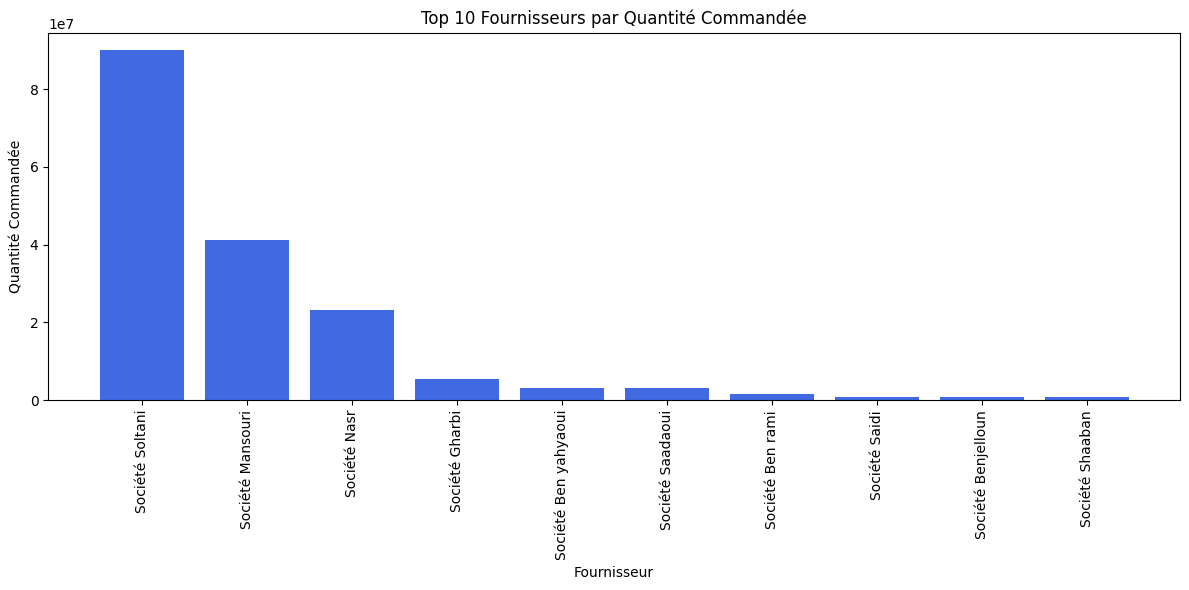

In [846]:
# S√©lectionner les 10 principaux fournisseurs par quantit√©
top_suppliers_quantity = achats.groupby('Nom Fournisseur')['Quantit√©_kg'].sum().reset_index()
top_suppliers_quantity = top_suppliers_quantity.sort_values(by='Quantit√©_kg', ascending=False).head(10)

# Tracer un diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(top_suppliers_quantity['Nom Fournisseur'], top_suppliers_quantity['Quantit√©_kg'], color='royalblue')
plt.title('Top 10 Fournisseurs par Quantit√© Command√©e')
plt.xlabel('Fournisseur')
plt.ylabel('Quantit√© Command√©e')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


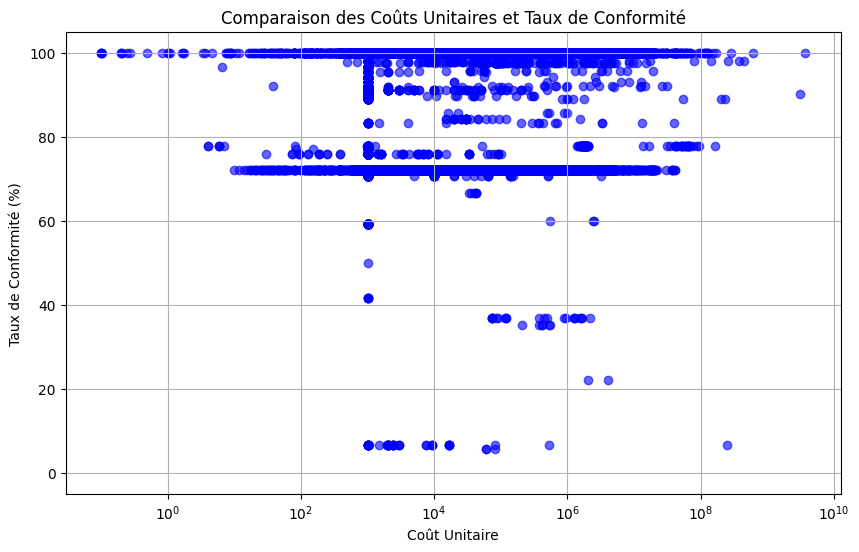

In [847]:
# Tracer un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(achats['Co√ªt unitaire'], achats['Taux de conformit√© (%)'], alpha=0.6, c='blue')
plt.title('Comparaison des Co√ªts Unitaires et Taux de Conformit√©')
plt.xlabel('Co√ªt Unitaire')
plt.ylabel('Taux de Conformit√© (%)')
plt.xscale('log')  # √âchelle logarithmique pour les co√ªts
plt.grid(True)
plt.show()

In [848]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article        Type article  Quantit√©  UM  \
0  SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1         FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2          FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3         reparation palettes                       Service    3402.0  UN   
4         Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   

     Montant Centre de cout  ... conformit√© Code Fournisseur  Nom Fournisseur  \
0    3081600        D051008  ...          1          5006997  Soci√©t√© Mohamed   
1   22276389          PR510  ...          1          5005182   Soci√©t√© Gharbi   
2  351000000          MP510  ...          1          5006889  Soci√©t√© Hammami   
3   10206000       D0510055  ...          1          5007369    Soci√©t√© Allah   
4    2054800          PR510  ...          1          5005182   Soci√©t√© Gharbi   

     adresse  Quantit√©_kg  Co√ªt unitaire Taux de conformit√© (%)  \
0      Gafsa          1.0   3.081600e+06             100.000000   
1     Nabeul      30000.0   7.425463e+02              72.143532   
2  Tataouine      45000.0   7.800000e+03             100.000000   
3   Jendouba       3402.0   3.000000e+03             100.000000   
4      Gab√®s          2.0   1.027400e+06              72.143532   

  √âcart de d√©lai  Statut Livraison  Nombre de commandes  
0            -16          Respect√©                   17  
1              8            Retard                 8472  
2             21            Retard                   20  
3              9            Retard                   43  
4             -2          Respect√©                 8472  

[5 rows x 24 columns]

In [849]:
# Convertir 'Statut Livraison' en valeur num√©rique
achats['Respect_d√©lais'] = (achats['Statut Livraison'] == 'Respect√©').astype(int)

# V√©rification rapide
print(achats[['Statut Livraison', 'Respect_d√©lais']].head())

  Statut Livraison  Respect_d√©lais
0         Respect√©               1
1           Retard               0
2           Retard               0
3           Retard               0
4         Respect√©               1


In [850]:
 # Calcul du Taux de Respect des D√©lais par fournisseur
taux_respect = achats.groupby('Nom Fournisseur').apply(
    lambda x: (x['Statut Livraison'] == 'Respect√©').mean() * 100
).reset_index(name='Taux de Respect (%)')

# Fusionner avec le DataFrame principal (si n√©cessaire)
achats = achats.merge(taux_respect, on='Nom Fournisseur', how='left')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\1844342875.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taux_respect = achats.groupby('Nom Fournisseur').apply(


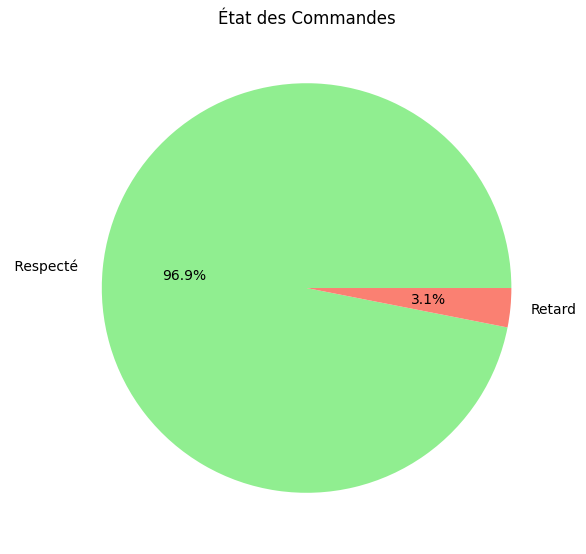

In [851]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['Respect_d√©lais'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=[' Respect√© ', 'Retard'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('√âtat des Commandes')
plt.tight_layout()
plt.show()

In [852]:
achats

Soci√©t√©  N¬∞commande Type commande               Code article  \
0            5    22000002            HS  HSDR0007                    
1            5    22000002            OR  P6311047                    
2            5    22000003            AC  M30511105                   
3            5    22000003            HS  HSDLI007                    
4            5    22000003            OR  P9523007                    
...        ...         ...           ...                        ...   
23078        5    24900731            OR  HSCLN0015                   
23079        5    24900731            OR  HSCLN0015                   
23080        5    24900732            OR  HSCLN0014                   
23081        5    24900733            OR  HSCLN0032                   
23082        5   922000015            OR  P5611013                    

                                    Article        Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1             FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2              FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3             reparation palettes                       Service    3402.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   
...                                      ...                ...       ...  ..   
23078         frais de participation                    Service       2.0  PI   
23079         hebergement                               Service       2.0  PI   
23080         Abonnement salle de sport                 Service       1.0  PI   
23081         disque dur externe SSD 512 go            Mat√©riel       1.0  PI   
23082         COLLIER DE SERRAGE 8/14                  Mat√©riel      30.0  PI   

         Montant Centre de cout  ...      Nom Fournisseur      adresse  \
0        3081600        D051008  ...      Soci√©t√© Mohamed        Gafsa   
1       22276389          PR510  ...       Soci√©t√© Gharbi       Nabeul   
2      351000000          MP510  ...      Soci√©t√© Hammami    Tataouine   
3       10206000       D0510055  ...        Soci√©t√© Allah     Jendouba   
4        2054800          PR510  ...       Soci√©t√© Gharbi        Gab√®s   
...          ...            ...  ...                  ...          ...   
23078    1344538        D051008  ...  Soci√©t√© Ben Mabrouk  Sidi Bouzid   
23079     280374        D051008  ...  Soci√©t√© Ben Mabrouk    Kasserine   
23080     873000        D051008  ...  Soci√©t√© Ben Mabrouk      Bizerte   
23081       1000        D051007  ...    Soci√©t√© Ben naser    Kasserine   
23082      19980          PR510  ...       Soci√©t√© Gharbi        Tunis   

       Quantit√©_kg  Co√ªt unitaire  Taux de conformit√© (%)  √âcart de d√©lai  \
0              1.0   3.081600e+06              100.000000             -16   
1          30000.0   7.425463e+02               72.143532               8   
2          45000.0   7.800000e+03              100.000000              21   
3           3402.0   3.000000e+03              100.000000               9   
4              2.0   1.027400e+06               72.143532              -2   
...            ...            ...                     ...             ...   
23078          2.0   6.722690e+05              100.000000             -18   
23079          2.0   1.401870e+05              100.000000             -18   
23080          1.0   8.730000e+05              100.000000             -18   
23081          1.0   1.000000e+03              100.000000             -43   
23082         30.0   6.660000e+02               72.143532              -5   

      Statut Livraison Nombre de commandes  Respect_d√©lais  \
0             Respect√©                  17               1   
1               Retard                8472               0   
2               Retard                  20               0   
3               Retard                  43               0   
4             Res

In [853]:
achats.columns

Index(['Soci√©t√©', 'N¬∞commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantit√©', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date r√©ception', 'dur√©e de livraion',
       'd√©lai de livraison', 'conformit√©', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'Quantit√©_kg', 'Co√ªt unitaire',
       'Taux de conformit√© (%)', '√âcart de d√©lai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_d√©lais', 'Taux de Respect (%)'],
      dtype='object')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\1124144851.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de Respect (%)'].apply(


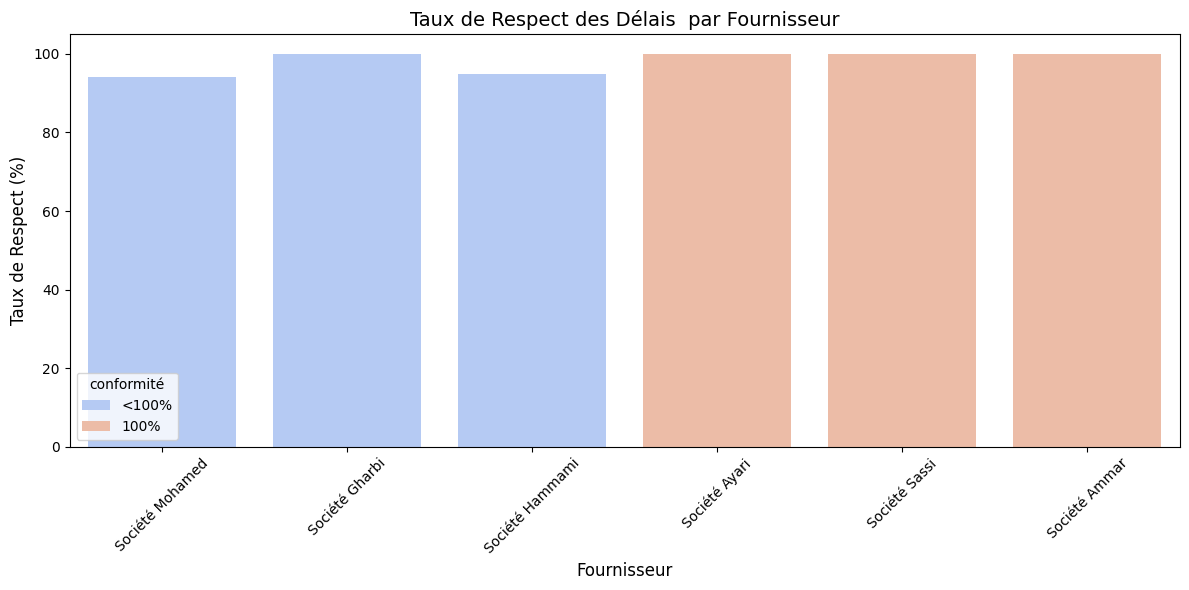

In [854]:
# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de Respect (%)'] == 100]
conformite_inferieur = achats[achats['Taux de Respect (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 fournisseurs avec conformit√© 100% et 3 avec inf√©rieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Cr√©er un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de Respect (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de Respect (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Respect des D√©lais  par Fournisseur', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Respect (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [855]:
achats.columns

Index(['Soci√©t√©', 'N¬∞commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantit√©', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date r√©ception', 'dur√©e de livraion',
       'd√©lai de livraison', 'conformit√©', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'Quantit√©_kg', 'Co√ªt unitaire',
       'Taux de conformit√© (%)', '√âcart de d√©lai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_d√©lais', 'Taux de Respect (%)'],
      dtype='object')

In [856]:
# Liste des colonnes √† supprimer
colonnes_a_supprimer = ['Montant', 'd√©lai de livraison',  'Statut Livraison','√âcart de d√©lai', 'Soci√©t√©','Centre de cout','Type commande','dur√©e de livraion']

# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

In [857]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
1        22000002  P6311047                    
2        22000003  M30511105                   
3        22000003  HSDLI007                    
4        22000003  P9523007                    
...           ...                        ...   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   
23082   922000015  P5611013                    

                                    Article        Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1             FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2              FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3             reparation palettes                       Service    3402.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   
...                                      ...                ...       ...  ..   
23078         frais de participation                    Service       2.0  PI   
23079         hebergement                               Service       2.0  PI   
23080         Abonnement salle de sport                 Service       1.0  PI   
23081         disque dur externe SSD 512 go            Mat√©riel       1.0  PI   
23082         COLLIER DE SERRAGE 8/14                  Mat√©riel      30.0  PI   

      Date commande Date r√©ception  conformit√©  Code Fournisseur  \
0        2022-01-03     2022-01-12           1           5006997   
1        2022-01-04     2022-01-20           1           5005182   
2        2022-01-05     2022-01-30           1           5006889   
3        2022-01-03     2022-01-15           1           5007369   
4        2022-01-04     2022-01-10           1           5005182   
...             ...            ...         ...               ...   
23078    2024-10-24     2024-10-31           1            559911   
23079    2024-10-24     2024-10-31           1            559911   
23080    2024-10-24     2024-10-31           1            559911   
23081    2024-10-24     2024-10-31           1            550645   
23082    2022-01-05     2022-01-08           1           5005182   

           Nom Fournisseur      adresse  Quantit√©_kg  Co√ªt unitaire  \
0          Soci√©t√© Mohamed        Gafsa          1.0   3.081600e+06   
1           Soci√©t√© Gharbi       Nabeul      30000.0   7.425463e+02   
2          Soci√©t√© Hammami    Tataouine      45000.0   7.800000e+03   
3            Soci√©t√© Allah     Jendouba       3402.0   3.000000e+03   
4           Soci√©t√© Gharbi        Gab√®s          2.0   1.027400e+06   
...                    ...          ...          ...            ...   
23078  Soci√©t√© Ben Mabrouk  Sidi Bouzid          2.0   6.722690e+05   
23079  Soci√©t√© Ben Mabrouk    Kasserine          2.0   1.401870e+05   
23080  Soci√©t√© Ben Mabrouk      Bizerte          1.0   8.730000e+05   
23081    Soci√©t√© Ben naser    Kasserine          1.0   1.000000e+03   
23082       Soci√©t√© Gharbi        Tunis         30.0   6.660000e+02   

       Taux de conformit√© (%)  Nombre de commandes  Respect_d√©lais  \
0                  100.000000                   17               1   
1                   72.143532                 8472               0   
2                  100.000000                   20               0   
3                  100.000000                   43               0   
4                   72.143532                 8472               1   
...                       ...                  ...             ...   
23078              100.000000                  215               1   
23079              100.000000                  215               1   
23080              100.000000                  215               1   
23081              100.000000                  192

In [858]:
# D√©finition des pond√©rations (√† ajuster selon l'analyse)
w1, w2, w3, w4 = 0.4, 0.3, 0.2, 0.1  

In [859]:
# Normalisation du co√ªt unitaire (√©viter division par 0)
achats["Co√ªt unitaire normalis√©"] = 1 / (achats["Co√ªt unitaire"] + 1)  # Ajout de +1 pour √©viter l'infini
achats["Nombre commandes normalis√©"] = achats["Nombre de commandes"] / achats["Nombre de commandes"].max()

In [860]:
# Calcul du score (normalis√© entre 0 et 10)
achats["Score"] = 10 * (
    w1 * achats["Taux de conformit√© (%)"] / 100 +
    w2 * achats["Taux de Respect (%)"] / 100 +
    w3 * achats["Co√ªt unitaire normalis√©"] +
    w4 * achats["Nombre commandes normalis√©"]
)

In [861]:
# Fonction de cat√©gorisation
def categoriser(score):
    if score >= 8:
        return "Tr√®s Fiable"
    elif 5 <= score < 8:
        return "Moyen"
    else:
        return "Risqu√©"

# Appliquer la cat√©gorisation
achats["Cat√©gorie"] = achats["Score"].apply(categoriser)

# Afficher les r√©sultats
achats[["Nom Fournisseur", "Score", "Cat√©gorie"]].head(9)

Nom Fournisseur     Score    Cat√©gorie
0  Soci√©t√© Mohamed  6.825537        Moyen
1   Soci√©t√© Gharbi  6.886661        Moyen
2  Soci√©t√© Hammami  6.852617        Moyen
3    Soci√©t√© Allah  6.935975        Moyen
4   Soci√©t√© Gharbi  6.883973        Moyen
5      Soci√©t√© Ali  6.401500        Moyen
6    Soci√©t√© Dridi  5.500241        Moyen
7   Soci√©t√© Cherif  8.254465  Tr√®s Fiable
8    Soci√©t√© Ayari  7.001739        Moyen

In [862]:

# Afficher uniquement les fournisseurs "Risqu√©"
print(achats[achats["Cat√©gorie"] == "Risqu√©"][["Nom Fournisseur", "Score","Cat√©gorie"]])

            Nom Fournisseur     Score Cat√©gorie
161           Soci√©t√© Saeed  4.322519    Risqu√©
1207          Soci√©t√© Saeed  4.322519    Risqu√©
1311          Soci√©t√© Saeed  4.322518    Risqu√©
1563           Soci√©t√© Amin  4.274074    Risqu√©
1564           Soci√©t√© Amin  4.274064    Risqu√©
...                     ...       ...       ...
20801  Soci√©t√© Ben boubaker  4.000119    Risqu√©
20929  Soci√©t√© Ben Mansouri  4.000119    Risqu√©
20952   Soci√©t√© Ben mansour  4.000118    Risqu√©
21573     Soci√©t√© Ben saber  4.000121    Risqu√©
21575         Soci√©t√© Saeed  4.322540    Risqu√©

[108 rows x 3 columns]


In [863]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
1        22000002  P6311047                    
2        22000003  M30511105                   
3        22000003  HSDLI007                    
4        22000003  P9523007                    
...           ...                        ...   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   
23082   922000015  P5611013                    

                                    Article        Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1             FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2              FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3             reparation palettes                       Service    3402.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   
...                                      ...                ...       ...  ..   
23078         frais de participation                    Service       2.0  PI   
23079         hebergement                               Service       2.0  PI   
23080         Abonnement salle de sport                 Service       1.0  PI   
23081         disque dur externe SSD 512 go            Mat√©riel       1.0  PI   
23082         COLLIER DE SERRAGE 8/14                  Mat√©riel      30.0  PI   

      Date commande Date r√©ception  conformit√©  Code Fournisseur  ...  \
0        2022-01-03     2022-01-12           1           5006997  ...   
1        2022-01-04     2022-01-20           1           5005182  ...   
2        2022-01-05     2022-01-30           1           5006889  ...   
3        2022-01-03     2022-01-15           1           5007369  ...   
4        2022-01-04     2022-01-10           1           5005182  ...   
...             ...            ...         ...               ...  ...   
23078    2024-10-24     2024-10-31           1            559911  ...   
23079    2024-10-24     2024-10-31           1            559911  ...   
23080    2024-10-24     2024-10-31           1            559911  ...   
23081    2024-10-24     2024-10-31           1            550645  ...   
23082    2022-01-05     2022-01-08           1           5005182  ...   

      Quantit√©_kg Co√ªt unitaire  Taux de conformit√© (%)  Nombre de commandes  \
0             1.0  3.081600e+06              100.000000                   17   
1         30000.0  7.425463e+02               72.143532                 8472   
2         45000.0  7.800000e+03              100.000000                   20   
3          3402.0  3.000000e+03              100.000000                   43   
4             2.0  1.027400e+06               72.143532                 8472   
...           ...           ...                     ...                  ...   
23078         2.0  6.722690e+05              100.000000                  215   
23079         2.0  1.401870e+05              100.000000                  215   
23080         1.0  8.730000e+05              100.000000                  215   
23081         1.0  1.000000e+03              100.000000                  192   
23082        30.0  6.660000e+02               72.143532                 8472   

       Respect_d√©lais  Taux de Respect (%)  Co√ªt unitaire normalis√©  \
0                   1            94.117647             3.245066e-07   
1                   0            99.940982             1.344906e-03   
2                   0            95.000000             1.281887e-04   
3                   0            97.674419             3.332223e-04   
4                   1            99.940982             9.733298e-07   
...               ...                  ...                      ...   
23078               1           100.000000             1.487498e-06   
23079               1           1

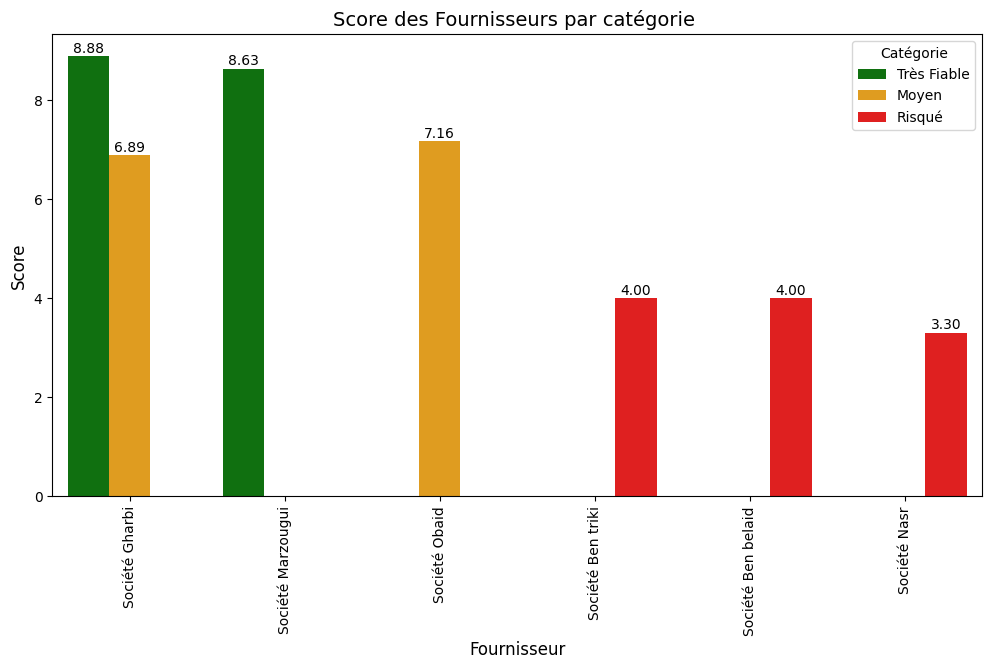

In [864]:
# S√©lectionner un sous-ensemble de 3 fournisseurs par cat√©gorie
fournisseurs_tres_fiable = achats[achats['Cat√©gorie'] == 'Tr√®s Fiable'].sample(n=3, random_state=1)
fournisseurs_moyen = achats[achats['Cat√©gorie'] == 'Moyen'].sample(n=3, random_state=1)
fournisseurs_risque = achats[achats['Cat√©gorie'] == 'Risqu√©'].sample(n=3, random_state=1)

# Combiner les sous-ensembles
fournisseurs_selectionnes = pd.concat([fournisseurs_tres_fiable, fournisseurs_moyen, fournisseurs_risque])

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=fournisseurs_selectionnes, 
            x='Nom Fournisseur', 
            y='Score', 
            hue='Cat√©gorie', 
            palette=['green', 'orange', 'red'])  # Utilisation d'une palette pour les 3 cat√©gories

# Ajouter un titre et des labels
plt.title("Score des Fournisseurs par cat√©gorie ", fontsize=14)
plt.xlabel("Fournisseur", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Rotation des √©tiquettes de l'axe x
plt.xticks(rotation=90)

# Affichage de la l√©gende
plt.legend(title="Cat√©gorie")

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Afficher le graphique
plt.show()


In [865]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
1        22000002  P6311047                    
2        22000003  M30511105                   
3        22000003  HSDLI007                    
4        22000003  P9523007                    
...           ...                        ...   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   
23082   922000015  P5611013                    

                                    Article        Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                       Service       1.0  UN   
1             FUEL LOURD N¬∞2                  √ânergie/Carburant      30.0  TN   
2              FILM THERMOR√âTRACTABLE NG 40¬µ            Service   45000.0  KG   
3             reparation palettes                       Service    3402.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS           Mat√©riel       2.0  PC   
...                                      ...                ...       ...  ..   
23078         frais de participation                    Service       2.0  PI   
23079         hebergement                               Service       2.0  PI   
23080         Abonnement salle de sport                 Service       1.0  PI   
23081         disque dur externe SSD 512 go            Mat√©riel       1.0  PI   
23082         COLLIER DE SERRAGE 8/14                  Mat√©riel      30.0  PI   

      Date commande Date r√©ception  conformit√©  Code Fournisseur  ...  \
0        2022-01-03     2022-01-12           1           5006997  ...   
1        2022-01-04     2022-01-20           1           5005182  ...   
2        2022-01-05     2022-01-30           1           5006889  ...   
3        2022-01-03     2022-01-15           1           5007369  ...   
4        2022-01-04     2022-01-10           1           5005182  ...   
...             ...            ...         ...               ...  ...   
23078    2024-10-24     2024-10-31           1            559911  ...   
23079    2024-10-24     2024-10-31           1            559911  ...   
23080    2024-10-24     2024-10-31           1            559911  ...   
23081    2024-10-24     2024-10-31           1            550645  ...   
23082    2022-01-05     2022-01-08           1           5005182  ...   

      Quantit√©_kg Co√ªt unitaire  Taux de conformit√© (%)  Nombre de commandes  \
0             1.0  3.081600e+06              100.000000                   17   
1         30000.0  7.425463e+02               72.143532                 8472   
2         45000.0  7.800000e+03              100.000000                   20   
3          3402.0  3.000000e+03              100.000000                   43   
4             2.0  1.027400e+06               72.143532                 8472   
...           ...           ...                     ...                  ...   
23078         2.0  6.722690e+05              100.000000                  215   
23079         2.0  1.401870e+05              100.000000                  215   
23080         1.0  8.730000e+05              100.000000                  215   
23081         1.0  1.000000e+03              100.000000                  192   
23082        30.0  6.660000e+02               72.143532                 8472   

       Respect_d√©lais  Taux de Respect (%)  Co√ªt unitaire normalis√©  \
0                   1            94.117647             3.245066e-07   
1                   0            99.940982             1.344906e-03   
2                   0            95.000000             1.281887e-04   
3                   0            97.674419             3.332223e-04   
4                   1            99.940982             9.733298e-07   
...               ...                  ...                      ...   
23078               1           100.000000             1.487498e-06   
23079               1           1

In [866]:
# Calculer la fr√©quence par mois
frequence_par_article = achats.groupby('Code article')['Date commande'].count() / achats.groupby('Code article')['Date commande'].apply(lambda x: x.dt.to_period('M').nunique())
achats = achats.merge(frequence_par_article.rename('Fr√©quence'), on='Code article')



In [867]:
print(frequence_par_article.describe())


count    4237.000000
mean        1.684374
std         1.596553
min         1.000000
25%         1.000000
50%         1.222222
75%         2.000000
max        51.205882
Name: Date commande, dtype: float64


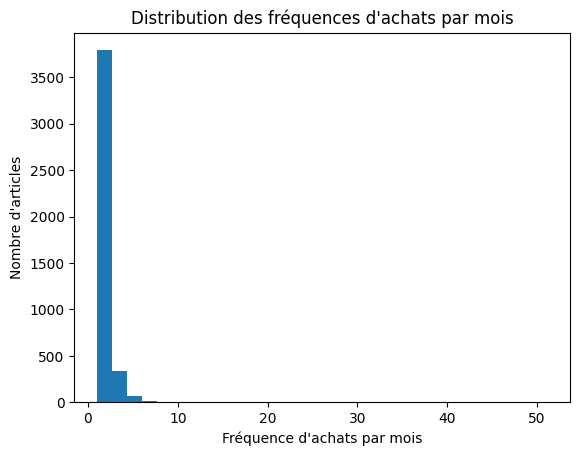

In [868]:
import matplotlib.pyplot as plt

plt.hist(frequence_par_article, bins=30)
plt.title("Distribution des fr√©quences d'achats par mois")
plt.xlabel("Fr√©quence d'achats par mois")
plt.ylabel("Nombre d'articles")
plt.show()


In [869]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape pour KMeans
freq_values = achats['Fr√©quence'].values.reshape(-1, 1)

# 3 clusters : 0, 1, 2
kmeans = KMeans(n_clusters=3, random_state=42)
achats['Horizon_cluster'] = kmeans.fit_predict(freq_values)

# On trie les clusters selon la fr√©quence moyenne
cluster_means = achats.groupby('Horizon_cluster')['Fr√©quence'].mean().sort_values()

# Remap : cluster le plus fr√©quent ‚Üí Horizon = 1
horizon_map = {old: new for new, old in enumerate(cluster_means.index[::-1], start=1)}
achats['Horizon'] = achats['Horizon_cluster'].map(horizon_map)

# Optionnel : supprimer la colonne interm√©diaire
achats.drop(columns='Horizon_cluster', inplace=True)


In [870]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Pr√©paration des donn√©es
achats['Date commande'] = pd.to_datetime(achats['Date commande'])
# Extraire le mois, l'ann√©e et le trimestre
achats['Mois'] = achats['Date commande'].dt.month
achats['Ann√©e'] = achats['Date commande'].dt.year
achats['Trimestre'] = achats['Date commande'].dt.quarter
achats['Jour_semaine'] = achats['Date commande'].dt.dayofweek
# 3. Transformation en sinus et cosinus pour capturer la saisonnalit√©
achats['Mois_Sin'] = np.sin(2 * np.pi * achats['Mois'] / 12)
achats['Mois_Cos'] = np.cos(2 * np.pi * achats['Mois'] / 12)

# Filtrer les outliers # 4. Elimination des outliers en utilisant l'IQR
Q1 = achats['Quantit√©'].quantile(0.25)
Q3 = achats['Quantit√©'].quantile(0.75)
IQR = Q3 - Q1
achats = achats[~((achats['Quantit√©'] < (Q1 - 1.5 * IQR)) | (achats['Quantit√©'] > (Q3 + 1.5 * IQR)))]


# Cr√©er 'Article_Fournisseur' 
# 7. Cr√©ation d'une variable combin√©e 'Article_Fournisseur' pour l'analyse
achats['Article_Fournisseur'] = achats['Article '] + " - " + achats['Nom Fournisseur']

# S√©lectionner les features
features = [
    'Type article', 'Score', 'Taux de conformit√© (%)', 'Co√ªt unitaire',
    'Nombre de commandes', 'Mois', 'Ann√©e', 'Horizon', 'Taux de Respect (%)',
    'Trimestre', 'Jour_semaine', 'Mois_Sin', 'Mois_Cos'
]



# Encoder et pr√©parer les donn√©es
X = pd.get_dummies(achats[features], drop_first=True)
y = np.log1p(achats['Quantit√©'])

# Diviser les donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajouter les features moyennes sans fuite de donn√©es
achats_train = achats.loc[X_train.index]
achats_test = achats.loc[X_test.index]
X_train['Quantit√©_Moyenne_Article'] = achats_train.groupby('Code article')['Quantit√©'].transform('mean')
X_test['Quantit√©_Moyenne_Article'] = achats_test.groupby('Code article')['Quantit√©'].transform('mean').reindex(X_test.index, fill_value=achats['Quantit√©'].mean())
X_train['Quantit√©_Moyenne_Fournisseur'] = achats_train.groupby('Nom Fournisseur')['Quantit√©'].transform('mean')
X_test['Quantit√©_Moyenne_Fournisseur'] = achats_test.groupby('Nom Fournisseur')['Quantit√©'].transform('mean').reindex(X_test.index, fill_value=achats['Quantit√©'].mean())

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entra√Ænement
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=20, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)

# Pr√©dictions
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))
y_test_raw = np.expm1(y_test)

# √âvaluer
rmse = root_mean_squared_error(y_test_raw, rf_predictions)
mae = mean_absolute_error(y_test_raw, rf_predictions)
r2 = r2_score(y_test_raw, rf_predictions)
print("RMSE :", rmse)
print("MAE :", mae)
print("R¬≤ :", r2)

# Afficher les r√©sultats
results = X_test.copy()
results['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results['Quantit√©_Pr√©dite'] = rf_predictions
results['Quantit√©_R√©elle'] = y_test_raw
results['Erreur_Absolue'] = np.abs(results['Quantit√©_Pr√©dite'] - results['Quantit√©_R√©elle'])
print(results[['Article_Fournisseur', 'Horizon', 'Quantit√©_Pr√©dite', 'Quantit√©_R√©elle', 'Erreur_Absolue']])


RMSE : 1.9246600120870918
MAE : 0.7968696175926432
R¬≤ : 0.6393405412474389
                                     Article_Fournisseur  Horizon  \
558     Polo Bleu-marine XXXL          - Soci√©t√© Mahmoud        3   
14975    CARTE 90100-0042/90604-2455    - Soci√©t√© Gharbi        3   
22225  thermometre a alcool           - Soci√©t√© Ben l...        2   
8021       r√©paration chariot cat         - Soci√©t√© Ayad        1   
16094    TIGHTENING NUT 1558918-0000    - Soci√©t√© Gharbi        3   
...                                                  ...      ...   
21481  Spare part kit6-99041638       - Soci√©t√© Ben m...        3   
978      Test d'int√©grit√© √©changeur N¬∞1 - Soci√©t√© Cherif        3   
18667   RUDDER STRIP1516243-0000       - Soci√©t√© Belhadj        3   
16224    Element  Accouplement H125     - Soci√©t√© Gharbi        3   
7081     Service kit6-9611923032        - Soci√©t√© Gharbi        3   

       Quantit√©_Pr√©dite  Quantit√©_R√©elle  Erreur_Absolue  
558    

In [871]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
4        22000003  P9523007                    
6        22000004  HSDLI003                    
7        22000004  HSDT0020                    
13       22000043  HSDR0009                    
...           ...                        ...   
23077    24900730  HSCLN0020                   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   

                                    Article  Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                 Service       1.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS     Mat√©riel       2.0  PC   
6             transport beurre"landor"            Service       1.0  UN   
7             Capteur pression r√©f1089049252     Mat√©riel       1.0  UN   
13            FA21/238457                         Service       1.0  LT   
...                                      ...          ...       ...  ..   
23077         Mission a JORDANIE                  Service       3.0  PI   
23078         frais de participation              Service       2.0  PI   
23079         hebergement                         Service       2.0  PI   
23080         Abonnement salle de sport           Service       1.0  PI   
23081         disque dur externe SSD 512 go      Mat√©riel       1.0  PI   

      Date commande Date r√©ception  conformit√©  Code Fournisseur  ...  \
0        2022-01-03     2022-01-12           1           5006997  ...   
4        2022-01-04     2022-01-10           1           5005182  ...   
6        2022-01-03     2022-01-17           1           5005954  ...   
7        2022-01-04     2022-01-10           0            550737  ...   
13       2022-01-18     2022-01-21           1           5007091  ...   
...             ...            ...         ...               ...  ...   
23077    2024-10-24     2024-10-31           1            559911  ...   
23078    2024-10-24     2024-10-31           1            559911  ...   
23079    2024-10-24     2024-10-31           1            559911  ...   
23080    2024-10-24     2024-10-31           1            559911  ...   
23081    2024-10-24     2024-10-31           1            550645  ...   

         Cat√©gorie  Fr√©quence  Horizon  Mois  Ann√©e  Trimestre  Jour_semaine  \
0            Moyen  25.750000        2     1   2022          1             0   
4            Moyen   1.000000        3     1   2022          1             1   
6            Moyen  13.500000        3     1   2022          1             0   
7      Tr√®s Fiable  14.000000        2     1   2022          1             1   
13           Moyen  12.333333        3     1   2022          1             1   
...            ...        ...      ...   ...    ...        ...           ...   
23077        Moyen   2.400000        3    10   2024          4             3   
23078        Moyen   7.307692        3    10   2024          4             3   
23079        Moyen   7.307692        3    10   2024          4             3   
23080        Moyen   2.625000        3    10   2024          4             3   
23081        Moyen  11.090909        3    10   2024          4             3   

       Mois_Sin  Mois_Cos                                Article_Fournisseur  
0      0.500000  0.866025  SRTJ du E2:E13530/11/2021.            - Soci√©t...  
4      0.500000  0.866025    Glasse de niv Type A N¬∞7 A/JTS - Soci√©t√© Gharbi  
6      0.500000  0.866025     transport beurre"landor"       - Soci√©t√© Dridi  
7      0.500000  0.866025    Capteur pression r√©f1089049252 - Soci√©t√© Cherif  
13     0.500000  0.866025     FA21/238457                    - Soci√©t√© Ahmed  
...         ...       ...                                                ...  
23077 -0.866025  0.500000  Mission a JORDANIE             - Soci√©t√© Ben M...  
23078 -0.866025  0.500000  frais 

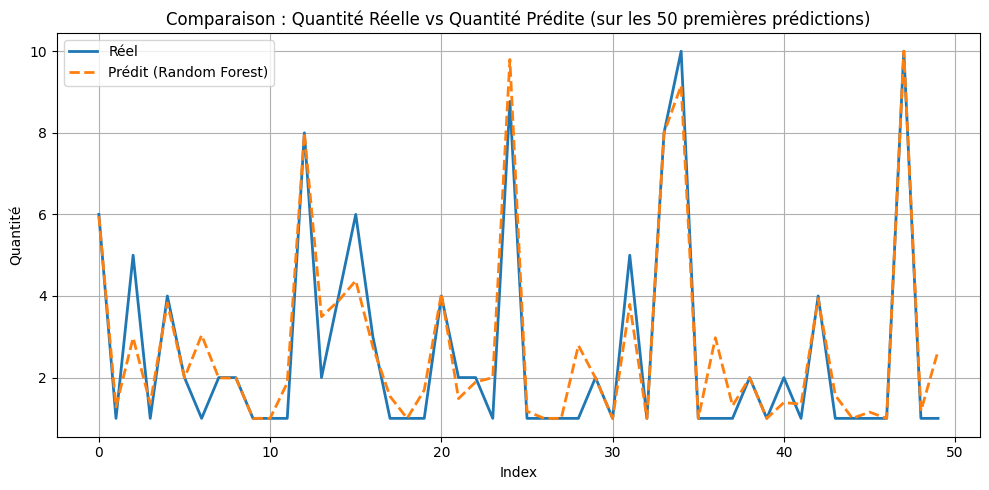

In [872]:
import matplotlib.pyplot as plt

# Suppose que tu as un DataFrame 'results' contenant les colonnes 'Quantit√©_R√©elle' et 'Quantit√©_Pr√©dite'
results = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],       # valeurs r√©elles
    'Quantit√©_Pr√©dite': rf_predictions[:50]   # valeurs pr√©dites
})

plt.figure(figsize=(10, 5))
plt.plot(results['Quantit√©_R√©elle'].values, label='R√©el', linewidth=2)
plt.plot(results['Quantit√©_Pr√©dite'].values, label='Pr√©dit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantit√© R√©elle vs Quantit√© Pr√©dite (sur les 50 premi√®res pr√©dictions)')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [873]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs param√®tres :", grid_search.best_params_)

Meilleurs param√®tres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [874]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Meilleurs param√®tres trouv√©s par GridSearchCV
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 100
}

# Entra√Ænement avec XGBoost
xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entra√Ænement du mod√®le
xgb_model.fit(X_train_scaled, y_train)

# Pr√©dictions
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))

# √âvaluation des performances
xgb_rmse = np.sqrt(((y_test_raw - xgb_predictions) ** 2).mean())
xgb_mae = mean_absolute_error(y_test_raw, xgb_predictions)
xgb_r2 = r2_score(y_test_raw, xgb_predictions)

print("\nüîπ [XGBoost] R√©sultats de performance :")
print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)
print("R¬≤ :", xgb_r2)

# R√©sultats XGBoost
results_xgb = X_test.copy()
results_xgb['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_xgb['Quantit√©_Pr√©dite'] = xgb_predictions
results_xgb['Quantit√©_R√©elle'] = y_test_raw
results_xgb['Erreur_Absolue'] = np.abs(results_xgb['Quantit√©_Pr√©dite'] - results_xgb['Quantit√©_R√©elle'])

print("\nExtrait des r√©sultats XGBoost :")
print(results_xgb[['Article_Fournisseur', 'Horizon', 'Quantit√©_Pr√©dite', 'Quantit√©_R√©elle', 'Erreur_Absolue']].head())




üîπ [XGBoost] R√©sultats de performance :
RMSE : 1.8650821301501281
MAE : 0.8124999196081886
R¬≤ : 0.6613233914624073

Extrait des r√©sultats XGBoost :
                                     Article_Fournisseur  Horizon  \
558     Polo Bleu-marine XXXL          - Soci√©t√© Mahmoud        3   
14975    CARTE 90100-0042/90604-2455    - Soci√©t√© Gharbi        3   
22225  thermometre a alcool           - Soci√©t√© Ben l...        2   
8021       r√©paration chariot cat         - Soci√©t√© Ayad        1   
16094    TIGHTENING NUT 1558918-0000    - Soci√©t√© Gharbi        3   

       Quantit√©_Pr√©dite  Quantit√©_R√©elle  Erreur_Absolue  
558            5.330945              6.0        0.669055  
14975          1.273320              1.0        0.273320  
22225          2.914958              5.0        2.085042  
8021           1.520190              1.0        0.520190  
16094          4.013211              4.0        0.013211  


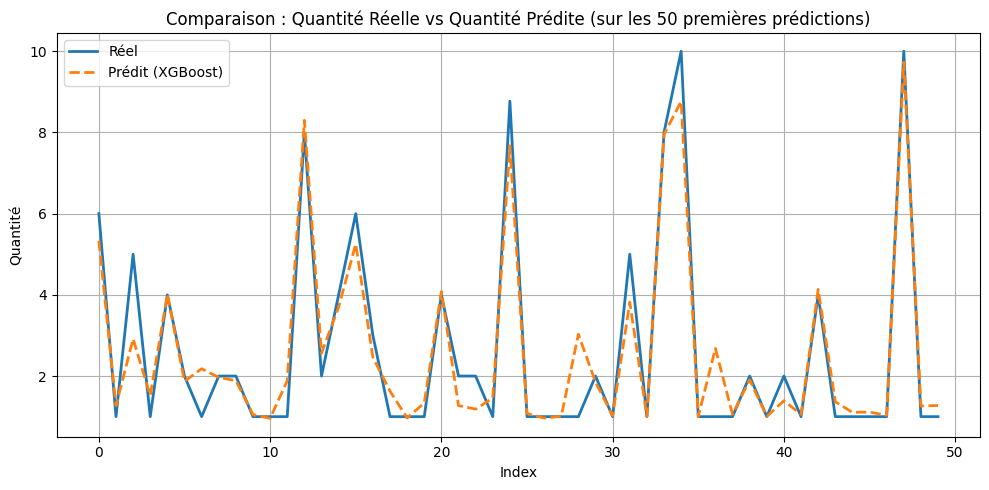

In [876]:
import matplotlib.pyplot as plt
import pandas as pd

# Suppose que tu as un DataFrame 'results_xgb' contenant les colonnes 'Quantit√©_R√©elle' et 'Quantit√©_Pr√©dite'
results_xgb = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],       # valeurs r√©elles
    'Quantit√©_Pr√©dite': xgb_predictions[:50]  # valeurs pr√©dites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_xgb['Quantit√©_R√©elle'].values, label='R√©el', linewidth=2)
plt.plot(results_xgb['Quantit√©_Pr√©dite'].values, label='Pr√©dit (XGBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantit√© R√©elle vs Quantit√© Pr√©dite (sur les 50 premi√®res pr√©dictions)')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [877]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Entra√Ænement avec CatBoost
catboost_model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bylevel=0.8,
    random_state=42,
    silent=True  # D√©sactive les logs pendant l'entra√Ænement
)

# Entra√Æner le mod√®le
catboost_model.fit(X_train_scaled, y_train)

# Pr√©dictions
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))

# √âvaluation des performances
catboost_rmse = np.sqrt(mean_squared_error(y_test_raw, catboost_predictions))
catboost_mae = mean_absolute_error(y_test_raw, catboost_predictions)
catboost_r2 = r2_score(y_test_raw, catboost_predictions)

print("\nüîπ [CatBoost] R√©sultats de performance :")
print("RMSE :", catboost_rmse)
print("MAE :", catboost_mae)
print("R¬≤ :", catboost_r2)

# R√©sultats CatBoost
results_catboost = X_test.copy()
results_catboost['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_catboost['Quantit√©_Pr√©dite'] = catboost_predictions
results_catboost['Quantit√©_R√©elle'] = y_test_raw
results_catboost['Erreur_Absolue'] = np.abs(results_catboost['Quantit√©_Pr√©dite'] - results_catboost['Quantit√©_R√©elle'])

print("\nExtrait des r√©sultats CatBoost :")
results_catboost[['Article_Fournisseur', 'Horizon', 'Quantit√©_Pr√©dite', 'Quantit√©_R√©elle', 'Erreur_Absolue']].head()



üîπ [CatBoost] R√©sultats de performance :
RMSE : 1.8494211578011435
MAE : 0.7934577133453996
R¬≤ : 0.6669872024282323

Extrait des r√©sultats CatBoost :


Article_Fournisseur  Horizon  \
558     Polo Bleu-marine XXXL          - Soci√©t√© Mahmoud        3   
14975    CARTE 90100-0042/90604-2455    - Soci√©t√© Gharbi        3   
22225  thermometre a alcool           - Soci√©t√© Ben l...        2   
8021       r√©paration chariot cat         - Soci√©t√© Ayad        1   
16094    TIGHTENING NUT 1558918-0000    - Soci√©t√© Gharbi        3   

       Quantit√©_Pr√©dite  Quantit√©_R√©elle  Erreur_Absolue  
558            5.195955              6.0        0.804045  
14975          1.319990              1.0        0.319990  
22225          2.652672              5.0        2.347328  
8021           1.140769              1.0        0.140769  
16094          4.163520              4.0        0.163520

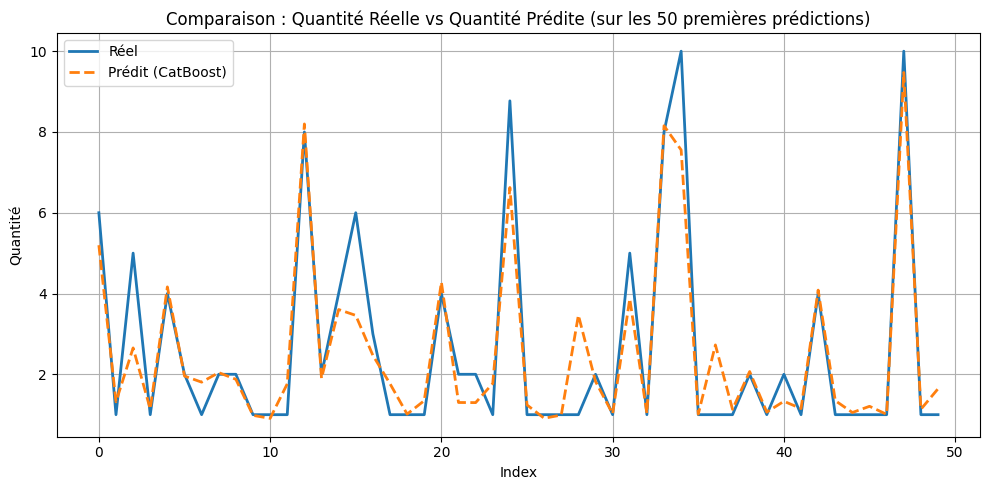

In [878]:
# Visualisation des r√©sultats
results_catboost_viz = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],       # valeurs r√©elles
    'Quantit√©_Pr√©dite': catboost_predictions[:50]  # valeurs pr√©dites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_catboost_viz['Quantit√©_R√©elle'].values, label='R√©el', linewidth=2)
plt.plot(results_catboost_viz['Quantit√©_Pr√©dite'].values, label='Pr√©dit (CatBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantit√© R√©elle vs Quantit√© Pr√©dite (sur les 50 premi√®res pr√©dictions)')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


üîπ [Random Forest] R√©sultats de performance :
RMSE : 1.9246600120870918
MAE : 0.7968696175926432
R¬≤ : 0.6393405412474389

üîπ [XGBoost] R√©sultats de performance :
RMSE : 1.8650821301501281
MAE : 0.8124999196081886
R¬≤ : 0.6613233914624073

üîπ [CatBoost] R√©sultats de performance :
RMSE : 1.8494211578011435
MAE : 0.7934577133453996
R¬≤ : 0.6669872024282323


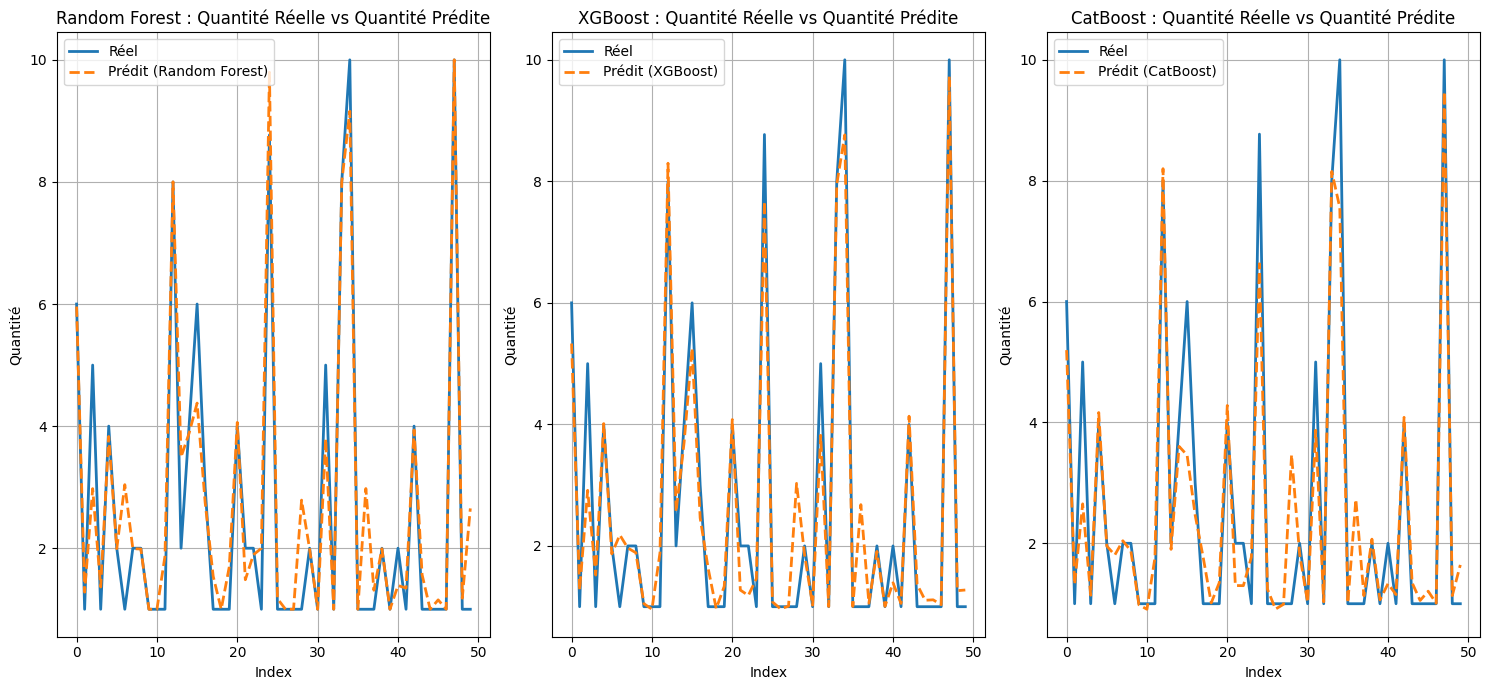


üîπ R√©sum√© des m√©triques pour chaque mod√®le :
           Model      RMSE       MAE        R¬≤
0  Random Forest  1.924660  0.796870  0.639341
1        XGBoost  1.865082  0.812500  0.661323
2       CatBoost  1.849421  0.793458  0.666987


In [879]:
# Pr√©dictions de chaque mod√®le (en supposant que tu as d√©j√† XGBoost, Random Forest et CatBoost entra√Æn√©s)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des m√©triques pour chaque mod√®le
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nüîπ [{model_name}] R√©sultats de performance :")
    print("RMSE :", rmse)
    print("MAE :", mae)
    print("R¬≤ :", r2)
    return rmse, mae, r2

# Affichage des r√©sultats de chaque mod√®le
rf_rmse, rf_mae, rf_r2 = print_metrics(y_test_raw, rf_predictions, "Random Forest")
xgb_rmse, xgb_mae, xgb_r2 = print_metrics(y_test_raw, xgb_predictions, "XGBoost")
catboost_rmse, catboost_mae, catboost_r2 = print_metrics(y_test_raw, catboost_predictions, "CatBoost")

# Comparaison visuelle des pr√©dictions des trois mod√®les
plt.figure(figsize=(15, 7))

# Graphiques pour comparer les trois mod√®les (50 premi√®res pr√©dictions)
plt.subplot(1, 3, 1)
plt.plot(y_test_raw[:50].values, label='R√©el', linewidth=2)
plt.plot(rf_predictions[:50], label='Pr√©dit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Random Forest : Quantit√© R√©elle vs Quantit√© Pr√©dite')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(y_test_raw[:50].values, label='R√©el', linewidth=2)
plt.plot(xgb_predictions[:50], label='Pr√©dit (XGBoost)', linestyle='--', linewidth=2)
plt.title('XGBoost : Quantit√© R√©elle vs Quantit√© Pr√©dite')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(y_test_raw[:50].values, label='R√©el', linewidth=2)
plt.plot(catboost_predictions[:50], label='Pr√©dit (CatBoost)', linestyle='--', linewidth=2)
plt.title('CatBoost : Quantit√© R√©elle vs Quantit√© Pr√©dite')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# R√©sum√© des m√©triques pour comparaison
print("\nüîπ R√©sum√© des m√©triques pour chaque mod√®le :")
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'CatBoost'],
    'RMSE': [rf_rmse, xgb_rmse, catboost_rmse],
    'MAE': [rf_mae, xgb_mae, catboost_mae],
    'R¬≤': [rf_r2, xgb_r2, catboost_r2]
})

print(comparison_df)


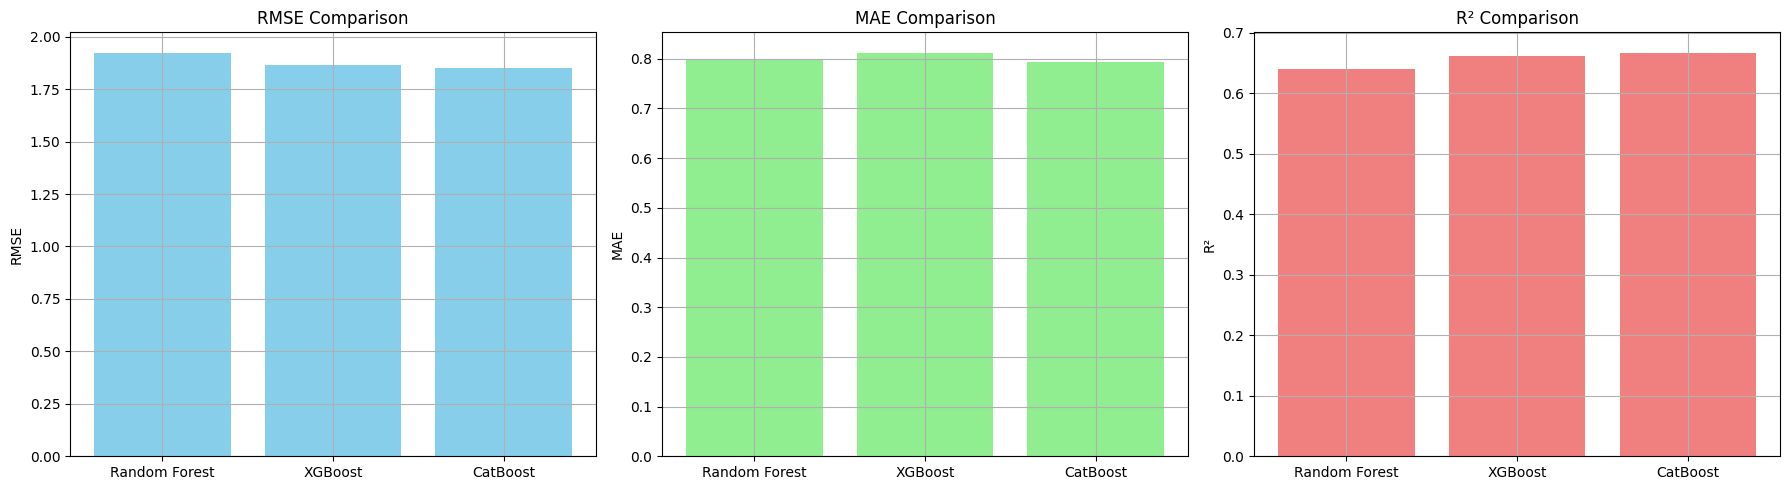

In [880]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pr√©dictions des trois mod√®les (en supposant qu'elles sont d√©j√† calcul√©es)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des m√©triques pour chaque mod√®le
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# M√©triques pour chaque mod√®le
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Comparaison visuelle des r√©sultats
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Cr√©ation de la figure
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# RMSE - Comparaison des mod√®les
ax[0].bar(models, rmse_values, color='skyblue')
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# MAE - Comparaison des mod√®les
ax[1].bar(models, mae_values, color='lightgreen')
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE')
ax[1].grid(True)

# R¬≤ - Comparaison des mod√®les
ax[2].bar(models, r2_values, color='lightcoral')
ax[2].set_title('R¬≤ Comparison')
ax[2].set_ylabel('R¬≤')
ax[2].grid(True)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


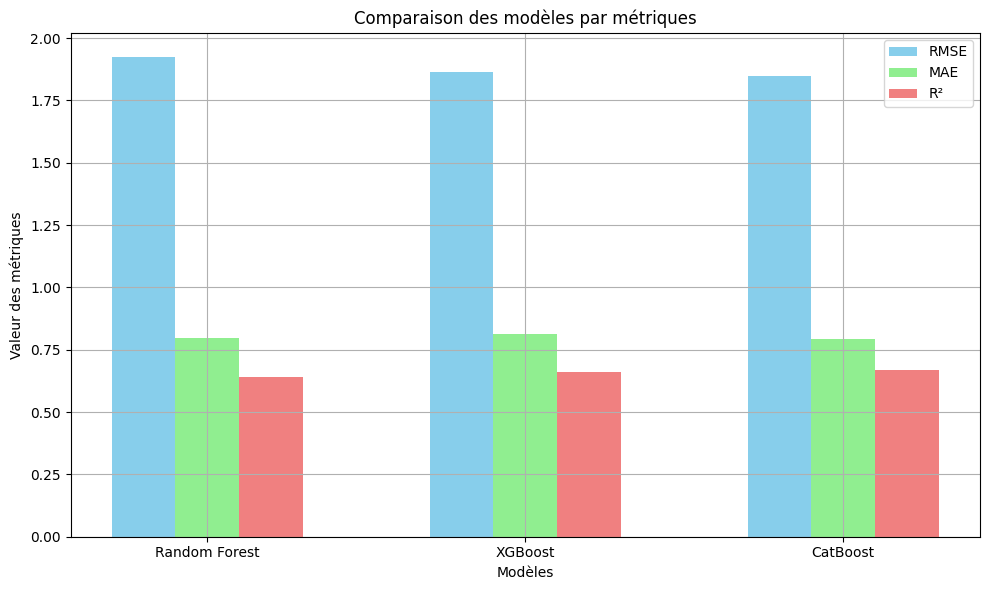

In [881]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pr√©dictions des trois mod√®les (en supposant qu'elles sont d√©j√† calcul√©es)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des m√©triques pour chaque mod√®le
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# M√©triques pour chaque mod√®le
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Mod√®les et leurs m√©triques
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Position des barres pour chaque m√©trique
x = np.arange(len(models))  # La position des mod√®les
width = 0.2  # Largeur des barres

# Cr√©ation de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour RMSE, MAE et R¬≤
bar1 = ax.bar(x - width, rmse_values, width, label='RMSE', color='skyblue')
bar2 = ax.bar(x, mae_values, width, label='MAE', color='lightgreen')
bar3 = ax.bar(x + width, r2_values, width, label='R¬≤', color='lightcoral')

# Ajout des √©tiquettes et titre
ax.set_xlabel('Mod√®les')
ax.set_ylabel('Valeur des m√©triques')
ax.set_title('Comparaison des mod√®les par m√©triques')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage de la grille
ax.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()


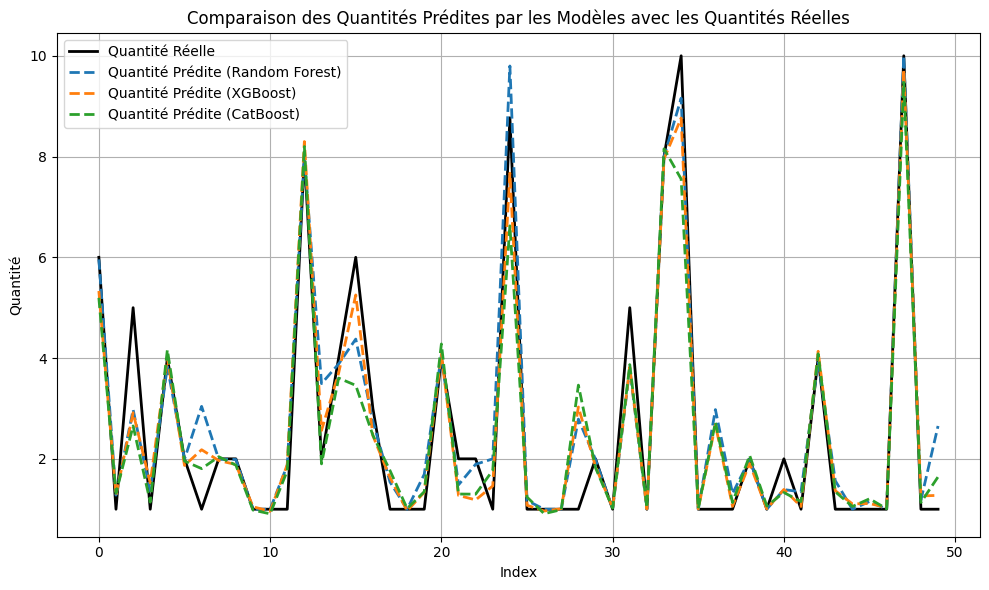

In [882]:
import matplotlib.pyplot as plt

# Cr√©e un DataFrame avec les quantit√©s r√©elles et pr√©dites pour chaque mod√®le
results_comparison = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],  # Quantit√© r√©elle (s√©lectionner les 50 premi√®res valeurs pour l'affichage)
    'Quantit√©_Predite_RF': rf_predictions[:50],  # Quantit√© pr√©dite par Random Forest
    'Quantit√©_Predite_XGB': xgb_predictions[:50],  # Quantit√© pr√©dite par XGBoost
    'Quantit√©_Predite_CB': catboost_predictions[:50]  # Quantit√© pr√©dite par CatBoost
})

# Cr√©ation du graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes
plt.plot(results_comparison['Quantit√©_R√©elle'].values, label='Quantit√© R√©elle', color='black', linewidth=2)
plt.plot(results_comparison['Quantit√©_Predite_RF'].values, label='Quantit√© Pr√©dite (Random Forest)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantit√©_Predite_XGB'].values, label='Quantit√© Pr√©dite (XGBoost)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantit√©_Predite_CB'].values, label='Quantit√© Pr√©dite (CatBoost)', linestyle='--', linewidth=2)

# Ajouter un titre et des labels
plt.title('Comparaison des Quantit√©s Pr√©dites par les Mod√®les avec les Quantit√©s R√©elles')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()

# Ajouter une grille pour une meilleure visibilit√©
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [883]:
# Liste des colonnes √† supprimer
colonnes_a_supprimer = ['Mois_Cos','Mois_Sin','Jour_semaine','Trimestre','Horizon', 'Fr√©quence', 'Article_Fournisseur','Co√ªt unitaire normalis√©','Quantit√©_kg','Nombre commandes normalis√©']
# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

In [884]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
4        22000003  P9523007                    
6        22000004  HSDLI003                    
7        22000004  HSDT0020                    
13       22000043  HSDR0009                    
...           ...                        ...   
23077    24900730  HSCLN0020                   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   

                                    Article  Type article  Quantit√©  UM  \
0      SRTJ du E2:E13530/11/2021.                 Service       1.0  UN   
4             Glasse de niv Type A N¬∞7 A/JTS     Mat√©riel       2.0  PC   
6             transport beurre"landor"            Service       1.0  UN   
7             Capteur pression r√©f1089049252     Mat√©riel       1.0  UN   
13            FA21/238457                         Service       1.0  LT   
...                                      ...          ...       ...  ..   
23077         Mission a JORDANIE                  Service       3.0  PI   
23078         frais de participation              Service       2.0  PI   
23079         hebergement                         Service       2.0  PI   
23080         Abonnement salle de sport           Service       1.0  PI   
23081         disque dur externe SSD 512 go      Mat√©riel       1.0  PI   

      Date commande Date r√©ception  conformit√©  Code Fournisseur  ...  \
0        2022-01-03     2022-01-12           1           5006997  ...   
4        2022-01-04     2022-01-10           1           5005182  ...   
6        2022-01-03     2022-01-17           1           5005954  ...   
7        2022-01-04     2022-01-10           0            550737  ...   
13       2022-01-18     2022-01-21           1           5007091  ...   
...             ...            ...         ...               ...  ...   
23077    2024-10-24     2024-10-31           1            559911  ...   
23078    2024-10-24     2024-10-31           1            559911  ...   
23079    2024-10-24     2024-10-31           1            559911  ...   
23080    2024-10-24     2024-10-31           1            559911  ...   
23081    2024-10-24     2024-10-31           1            550645  ...   

           adresse Co√ªt unitaire  Taux de conformit√© (%)  Nombre de commandes  \
0            Gafsa     3081600.0              100.000000                   17   
4            Gab√®s     1027400.0               72.143532                 8472   
6         Monastir      450000.0              100.000000                    2   
7          Siliana           0.0               89.845095                  581   
13        Kairouan       74374.0              100.000000                  178   
...            ...           ...                     ...                  ...   
23077     Kairouan     1998350.0              100.000000                  215   
23078  Sidi Bouzid      672269.0              100.000000                  215   
23079    Kasserine      140187.0              100.000000                  215   
23080      Bizerte      873000.0              100.000000                  215   
23081    Kasserine        1000.0              100.000000                  192   

       Respect_d√©lais  Taux de Respect (%)     Score    Cat√©gorie Mois  Ann√©e  
0                   1            94.117647  6.825537        Moyen    1   2022  
4                   1            99.940982  6.883973        Moyen    1   2022  
6                   0            50.000000  5.500241        Moyen    1   2022  
7                   1            86.402754  8.254465  Tr√®s Fiable    1   2022  
13                  1            99.438202  7.004183        Moyen    1   2022  
...               ...                  ...       ...          ...  ...    ...  
23077               1           100.000000  7.025379        Moyen   10   2024  
23078               1  

In [885]:
import joblib

# Sauvegarde du mod√®le localement
joblib.dump(catboost_model, "catboost_model.pkl")
print("‚úÖ Mod√®le sauvegard√© localement sous 'catboost_model.pkl'")
#üíæ Sauvegarde des r√©sultats dans un fichier CSV
results_catboost.to_csv("resultats_catboost.csv", index=False)
print("‚úÖ R√©sultats sauvegard√©s dans 'resultats_catboost.csv'")

‚úÖ Mod√®le sauvegard√© localement sous 'catboost_model.pkl'
‚úÖ R√©sultats sauvegard√©s dans 'resultats_catboost.csv'


In [886]:
# Sauvegarde du DataFrame dans un fichier CSV
achats.to_csv("dataframe_achats.csv", index=False)



print("‚úÖ DataFrame sauvegard√© dans 'dataframe_achats.csv'")



‚úÖ DataFrame sauvegard√© dans 'dataframe_achats.csv'
